<a href="https://colab.research.google.com/github/Sunnnyyy16/Dacon_study/blob/main/logistics/logistics_distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 물류 유통량 예측 경진대회
대회 사이트: https://dacon.io/competitions/official/235867/overview/description

택배 운송량을 예측하여 비대면 경제의 발전을 예측하기 위한 경진대회

# 목차
0. 데이터 로드
1. 데이터 EDA, visualization
2. 데이터 전처리
3. 모델 생성 및 학습
4. 제출, 결론
* 참고
https://dacon.io/competitions/official/235867/codeshare/4733?page=1&dtype=recent

In [1]:
# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,445 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [1]:
#visualization
import matplotlib as mpl
import matplotlib.pylab as plb
import matplotlib.pyplot as plt

# 브라우저에서 바로 그려지도록 
%matplotlib inline

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

# 0.데이터로드

In [3]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 메시지 숨기기
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
!cp /gdrive/MyDrive/Dacon_study/logistics/test.csv ./
!cp /gdrive/MyDrive/Dacon_study/logistics/sample_submission.csv ./
!cp /gdrive/MyDrive/Dacon_study/logistics/train.csv ./

In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31684 entries, 0 to 31683
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         31684 non-null  int64 
 1   송하인_격자공간고유번호  31684 non-null  int64 
 2   수하인_격자공간고유번호  31684 non-null  int64 
 3   물품_카테고리       31684 non-null  object
 4   운송장_건수        31684 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 1.2+ MB


* index
* 송하인_격자공간고유번호: 보내는 곳의 지역공간번호 ex) 서울시 강서구
* 수하인_격자공간고유번호: 받는 곳의 지역공간번호
* 물품_카테고리: 물품 종류
* 운송장_건수

In [7]:
train.head()

,index,송하인_격자공간고유번호,수하인_격자공간고유번호,물품_카테고리,운송장_건수
0,0,5011000595017300,2871000192069300,음반,3
1,1,4148000690043300,5011000264024400,문화컨텐츠,3
2,2,5011000078068400,1120000007005400,농산물,3
3,3,4127100048006400,5011000587019400,기타식품,7
4,4,5011000078068400,2823700010076300,농산물,3


In [8]:
print(train.shape)

(31684, 5)


In [9]:
test.head()

,index,송하인_격자공간고유번호,수하인_격자공간고유번호,물품_카테고리
0,0,4167000577042200,5011000435014100,선케어
1,1,1156000009012200,5011000172034400,구강위생용품
2,2,4122000363057300,5011000361097300,캠핑
3,3,5011000436041400,2826000084036400,아웃도어가구
4,4,4150000241065200,5011000169044300,분유/이유식/아기간식


In [10]:
print(test.shape)

(7920, 4)


# 데이터 EDA, visualization

## data cleansing

In [11]:
train.isnull().sum()

index           0
송하인_격자공간고유번호    0
수하인_격자공간고유번호    0
물품_카테고리         0
운송장_건수          0
dtype: int64

In [12]:
test.isnull().sum()

index           0
송하인_격자공간고유번호    0
수하인_격자공간고유번호    0
물품_카테고리         0
dtype: int64

null값 없다. 

In [13]:
train['물품_카테고리'].value_counts().head(30)

농산물          20321
문화컨텐츠         1091
음료            1034
수산             860
가공식품           846
기타식품           698
건강식품           591
음반             576
축산             383
냉동/간편조리식품      375
과자             320
생활용품           318
반려동물           315
주방용품           300
상의             294
기타패션의류         236
기타디지털/가전       220
스킨케어           205
문구/사무용품        167
건강용품           162
아우터            155
하의             150
기저귀/물티슈        130
기타화장품/미용       102
공구              95
다이어트식품          92
의료용품            82
인테리어소품          72
신발              70
취미용품            66
Name: 물품_카테고리, dtype: int64

In [14]:
train['물품_카테고리'].value_counts().shape

(100,)

물품 카테고리는 총 100개로 많은 편

In [15]:
train['송하인_격자공간고유번호'].value_counts().shape

(4229,)

데이터 31684 중에서 4229개의 송하인_격자공간고유번호

In [16]:
train['수하인_격자공간고유번호'].value_counts().shape

(26875,)

데이터 31684 중에서 26875개의 수하인_격자공간고유번호

## data visualization

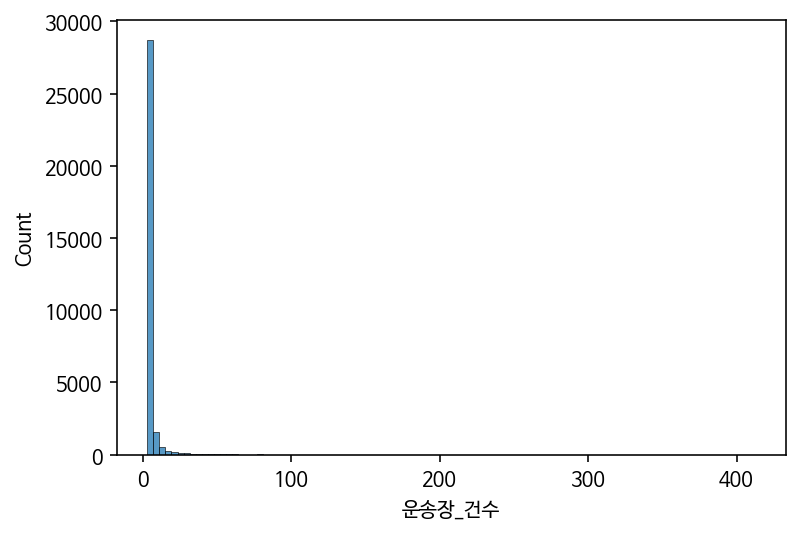

In [17]:
plt.figure()
sns.histplot(train['운송장_건수'], bins=100)
plt.show()

운송장 건수는 3-10 사이에 몰려있다. 

In [18]:
train['운송장_건수'].value_counts()

3      17565
4       6065
5       2928
6       1368
7        761
       ...  
77         1
108        1
211        1
130        1
89         1
Name: 운송장_건수, Length: 100, dtype: int64

# 데이터 전처리

In [19]:
# 송하인_격자공간고유번호 추출
train['send_grid'] = train['송하인_격자공간고유번호'].astype(str).str[:3].astype(int)
test['send_grid'] = test['송하인_격자공간고유번호'].astype(str).str[:3].astype(int)

# 수하인_격자공간고유번호 추출
train['rec_grid'] = train['수하인_격자공간고유번호'].astype(str).str[:3].astype(int)
test['rec_grid'] = test['수하인_격자공간고유번호'].astype(str).str[:3].astype(int)

In [ ]:
# train['sr_grid'] = train['send_grid'].astype(str).str.cat(train['rec_grid'].astype(str), sep=' - ')
# test['sr_grid'] = test['send_grid'].astype(str).str.cat(test['rec_grid'].astype(str), sep=' - ')

In [20]:
train.head()

,index,송하인_격자공간고유번호,수하인_격자공간고유번호,물품_카테고리,운송장_건수,send_grid,rec_grid
0,0,5011000595017300,2871000192069300,음반,3,501,287
1,1,4148000690043300,5011000264024400,문화컨텐츠,3,414,501
2,2,5011000078068400,1120000007005400,농산물,3,501,112
3,3,4127100048006400,5011000587019400,기타식품,7,412,501
4,4,5011000078068400,2823700010076300,농산물,3,501,282


In [ ]:
# train['trans_list'] = train['sr_grid'].str.cat(train['물품_카테고리'],sep=',')
# test['trans_list'] = test['sr_grid'].str.cat(test['물품_카테고리'],sep=',')

In [27]:
train.head()

,index,송하인_격자공간고유번호,수하인_격자공간고유번호,물품_카테고리,운송장_건수,send_grid,rec_grid
0,0,5011000595017300,2871000192069300,음반,3,501,287
1,1,4148000690043300,5011000264024400,문화컨텐츠,3,414,501
2,2,5011000078068400,1120000007005400,농산물,3,501,112
3,3,4127100048006400,5011000587019400,기타식품,7,412,501
4,4,5011000078068400,2823700010076300,농산물,3,501,282


In [28]:
test.head()

,index,송하인_격자공간고유번호,수하인_격자공간고유번호,물품_카테고리,send_grid,rec_grid
0,0,4167000577042200,5011000435014100,선케어,416,501
1,1,1156000009012200,5011000172034400,구강위생용품,115,501
2,2,4122000363057300,5011000361097300,캠핑,412,501
3,3,5011000436041400,2826000084036400,아웃도어가구,501,282
4,4,4150000241065200,5011000169044300,분유/이유식/아기간식,415,501


In [30]:
test_df = test.drop(['index','송하인_격자공간고유번호','수하인_격자공간고유번호'],axis=1)
test_df.head()

,물품_카테고리,send_grid,rec_grid
0,선케어,416,501
1,구강위생용품,115,501
2,캠핑,412,501
3,아웃도어가구,501,282
4,분유/이유식/아기간식,415,501


# 3. 모델생성 및 학습

## train, val 데이터 split

In [21]:
X= train.drop(['index','송하인_격자공간고유번호','수하인_격자공간고유번호','운송장_건수'],axis=1)
y= train['운송장_건수']
# y= np.log1p(train['운송장_건수'])

In [26]:
X.head()

,물품_카테고리,send_grid,rec_grid
0,음반,501,287
1,문화컨텐츠,414,501
2,농산물,501,112
3,기타식품,412,501
4,농산물,501,282


In [22]:
from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y = train_test_split(X,y, test_size=.20, random_state=42)

## Catboost

### 학습

In [23]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 7.8 MB/s eta 0:00:00


In [24]:
# 모델링 라이브러리
import catboost as cat
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error

In [25]:
cat_reg = CatBoostRegressor(n_estimators=200, random_state=42)

cat_reg.fit(train_x,train_y, cat_features=['물품_카테고리'])
pred = cat_reg.predict(val_x)
mse = mean_squared_error(val_y,pred)
rmse = mse**(1/2)

print("RMSE: ",rmse)

Learning rate set to 0.252501
0:	learn: 6.8596535	total: 59.4ms	remaining: 11.8s
1:	learn: 6.7904381	total: 69.7ms	remaining: 6.9s
2:	learn: 6.7742401	total: 77.8ms	remaining: 5.11s
3:	learn: 6.7534965	total: 85.1ms	remaining: 4.17s
4:	learn: 6.7439718	total: 96.7ms	remaining: 3.77s
5:	learn: 6.7386432	total: 106ms	remaining: 3.42s
6:	learn: 6.7323842	total: 115ms	remaining: 3.17s
7:	learn: 6.7019180	total: 124ms	remaining: 2.99s
8:	learn: 6.6989721	total: 132ms	remaining: 2.8s
9:	learn: 6.6969189	total: 140ms	remaining: 2.66s
10:	learn: 6.6967701	total: 145ms	remaining: 2.5s
11:	learn: 6.6923098	total: 154ms	remaining: 2.41s
12:	learn: 6.6887000	total: 161ms	remaining: 2.32s
13:	learn: 6.6881803	total: 169ms	remaining: 2.24s
14:	learn: 6.6839630	total: 178ms	remaining: 2.19s
15:	learn: 6.6823084	total: 184ms	remaining: 2.12s
16:	learn: 6.6775105	total: 198ms	remaining: 2.14s
17:	learn: 6.6751247	total: 208ms	remaining: 2.1s
18:	learn: 6.6733909	total: 216ms	remaining: 2.06s
19:	learn:

### 하이퍼파라미터 튜닝- optuna

In [31]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 348.5/348.5 KB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.0/81.0 KB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.4/210.4 KB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.0/50.0 KB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.1/147.1 KB 14.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.6/112.6 KB 9.8 MB/s eta 0:00:00
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=cfcb0eb3440b06275832bed462b8543c71c62b7e82aa86ba2d3fd9521a936d6a
  Stored in directory: /root/.cache/pip/wheels/7f/1a/65/84ff8c386bec21fca6d220ea1f5498a0367883a78dd5ba6122
Successfully built pyperclip
  At

In [32]:
# Optuna Libraries
import optuna
from optuna import Trial, visualization
from optuna.samplers import TPESampler

In [33]:
# random sampler
sampler = TPESampler(seed=10)

def objective(trial):

  cat_param = {
      'max_depth':trial.suggest_int('max_depth', 2, 12),
      'min_child_samples':trial.suggest_int('min_child_samples', 5, 100),
      'n_estimators':trial.suggest_int('n_estimators', 100, 500),
      'learning_rate':trial.suggest_loguniform('learning_rate',0.01,0.3)
  }
  
  model_cat = CatBoostRegressor(**cat_param)
    
  model_cat = model_cat.fit(train_x, train_y, eval_set=(val_x,val_y), cat_features=['물품_카테고리'])    
  
  # 평가지표
  MSE = mean_squared_error(val_y, model_cat.predict(val_x))

  return MSE
  
optuna_cat = optuna.create_study(direction='minimize',sampler = sampler)

optuna_cat.optimize(objective, n_trials=100)

[I 2023-01-04 12:34:38,645] A new study created in memory with name: no-name-47555d7d-c074-4567-a157-2e4fdfb1ef5e


0:	learn: 6.8797210	test: 6.1723636	best: 6.1723636 (0)	total: 21.6ms	remaining: 7.62s
1:	learn: 6.8640770	test: 6.1540559	best: 6.1540559 (1)	total: 61.6ms	remaining: 10.8s
2:	learn: 6.8535775	test: 6.1418580	best: 6.1418580 (2)	total: 80.4ms	remaining: 9.4s
3:	learn: 6.8115868	test: 6.1292906	best: 6.1292906 (3)	total: 138ms	remaining: 12.1s
4:	learn: 6.8018649	test: 6.1224451	best: 6.1224451 (4)	total: 203ms	remaining: 14.1s
5:	learn: 6.7725736	test: 6.0975035	best: 6.0975035 (5)	total: 264ms	remaining: 15.3s
6:	learn: 6.7691506	test: 6.0935932	best: 6.0935932 (6)	total: 275ms	remaining: 13.6s
7:	learn: 6.7666891	test: 6.0904069	best: 6.0904069 (7)	total: 304ms	remaining: 13.1s
8:	learn: 6.7441074	test: 6.0716823	best: 6.0716823 (8)	total: 369ms	remaining: 14.1s
9:	learn: 6.7018294	test: 6.0721598	best: 6.0716823 (8)	total: 428ms	remaining: 14.7s
10:	learn: 6.6792916	test: 6.0609116	best: 6.0609116 (10)	total: 496ms	remaining: 15.5s
11:	learn: 6.6776108	test: 6.0590954	best: 6.05909

[I 2023-01-04 12:34:55,937] Trial 0 finished with value: 36.327329128134 and parameters: {'max_depth': 10, 'min_child_samples': 6, 'n_estimators': 354, 'learning_rate': 0.12766567050674044}. Best is trial 0 with value: 36.327329128134.


348:	learn: 5.9967578	test: 6.1665136	best: 6.0272157 (24)	total: 16.5s	remaining: 237ms
349:	learn: 5.9964747	test: 6.1664434	best: 6.0272157 (24)	total: 16.5s	remaining: 189ms
350:	learn: 5.9963875	test: 6.1659475	best: 6.0272157 (24)	total: 16.6s	remaining: 142ms
351:	learn: 5.9962623	test: 6.1659390	best: 6.0272157 (24)	total: 16.6s	remaining: 94.2ms
352:	learn: 5.9935061	test: 6.1664210	best: 6.0272157 (24)	total: 16.6s	remaining: 47ms
353:	learn: 5.9927534	test: 6.1663323	best: 6.0272157 (24)	total: 16.6s	remaining: 0us

bestTest = 6.027215703
bestIteration = 24

Shrink model to first 25 iterations.
0:	learn: 6.8792737	test: 6.1718376	best: 6.1718376 (0)	total: 8.48ms	remaining: 1.51s
1:	learn: 6.8632206	test: 6.1531353	best: 6.1531353 (1)	total: 19.9ms	remaining: 1.76s
2:	learn: 6.8519109	test: 6.1401160	best: 6.1401160 (2)	total: 26.8ms	remaining: 1.57s
3:	learn: 6.8452071	test: 6.1327475	best: 6.1327475 (3)	total: 32.4ms	remaining: 1.42s
4:	learn: 6.8354455	test: 6.1270279	bes

[I 2023-01-04 12:34:57,538] Trial 1 finished with value: 36.264689043978414 and parameters: {'max_depth': 7, 'min_child_samples': 26, 'n_estimators': 179, 'learning_rate': 0.13286056037300167}. Best is trial 1 with value: 36.264689043978414.


175:	learn: 6.5000655	test: 6.0775031	best: 6.0220170 (34)	total: 1.43s	remaining: 24.4ms
176:	learn: 6.4998163	test: 6.0773340	best: 6.0220170 (34)	total: 1.44s	remaining: 16.2ms
177:	learn: 6.4971974	test: 6.0756348	best: 6.0220170 (34)	total: 1.44s	remaining: 8.12ms
178:	learn: 6.4971716	test: 6.0756206	best: 6.0220170 (34)	total: 1.45s	remaining: 0us

bestTest = 6.022017025
bestIteration = 34

Shrink model to first 35 iterations.
0:	learn: 6.8694438	test: 6.1602339	best: 6.1602339 (0)	total: 5.91ms	remaining: 2.2s
1:	learn: 6.8496306	test: 6.1375539	best: 6.1375539 (1)	total: 10.4ms	remaining: 1.94s
2:	learn: 6.8351904	test: 6.1244572	best: 6.1244572 (2)	total: 15.6ms	remaining: 1.93s
3:	learn: 6.8277759	test: 6.1157317	best: 6.1157317 (3)	total: 20.5ms	remaining: 1.9s
4:	learn: 6.8218731	test: 6.1113661	best: 6.1113661 (4)	total: 27.7ms	remaining: 2.04s
5:	learn: 6.8185965	test: 6.1086564	best: 6.1086564 (5)	total: 33.4ms	remaining: 2.05s
6:	learn: 6.8166012	test: 6.1069753	best: 

[I 2023-01-04 12:34:59,959] Trial 2 finished with value: 36.03764991841892 and parameters: {'max_depth': 3, 'min_child_samples': 13, 'n_estimators': 374, 'learning_rate': 0.2560221708894264}. Best is trial 2 with value: 36.03764991841892.


350:	learn: 6.5832890	test: 6.0047070	best: 6.0031367 (326)	total: 2.05s	remaining: 134ms
351:	learn: 6.5830992	test: 6.0046356	best: 6.0031367 (326)	total: 2.06s	remaining: 129ms
352:	learn: 6.5826741	test: 6.0046188	best: 6.0031367 (326)	total: 2.07s	remaining: 123ms
353:	learn: 6.5824836	test: 6.0042772	best: 6.0031367 (326)	total: 2.07s	remaining: 117ms
354:	learn: 6.5824690	test: 6.0042682	best: 6.0031367 (326)	total: 2.08s	remaining: 111ms
355:	learn: 6.5820121	test: 6.0040481	best: 6.0031367 (326)	total: 2.08s	remaining: 105ms
356:	learn: 6.5814453	test: 6.0040712	best: 6.0031367 (326)	total: 2.09s	remaining: 99.7ms
357:	learn: 6.5811493	test: 6.0051350	best: 6.0031367 (326)	total: 2.1s	remaining: 93.8ms
358:	learn: 6.5810669	test: 6.0052125	best: 6.0031367 (326)	total: 2.1s	remaining: 88ms
359:	learn: 6.5810571	test: 6.0052145	best: 6.0031367 (326)	total: 2.11s	remaining: 82ms
360:	learn: 6.5808990	test: 6.0054003	best: 6.0031367 (326)	total: 2.11s	remaining: 76.2ms
361:	learn:

[I 2023-01-04 12:35:02,245] Trial 3 finished with value: 36.736363077329116 and parameters: {'max_depth': 2, 'min_child_samples': 54, 'n_estimators': 425, 'learning_rate': 0.0803110441567395}. Best is trial 2 with value: 36.03764991841892.


405:	learn: 6.7547030	test: 6.0626685	best: 6.0626516 (400)	total: 1.95s	remaining: 91.3ms
406:	learn: 6.7545756	test: 6.0626029	best: 6.0626029 (406)	total: 1.95s	remaining: 86.5ms
407:	learn: 6.7545662	test: 6.0625731	best: 6.0625731 (407)	total: 1.96s	remaining: 81.6ms
408:	learn: 6.7537896	test: 6.0627081	best: 6.0625731 (407)	total: 1.96s	remaining: 76.8ms
409:	learn: 6.7537543	test: 6.0626550	best: 6.0625731 (407)	total: 1.97s	remaining: 72ms
410:	learn: 6.7537193	test: 6.0627213	best: 6.0625731 (407)	total: 1.97s	remaining: 67.2ms
411:	learn: 6.7537188	test: 6.0627211	best: 6.0625731 (407)	total: 1.98s	remaining: 62.4ms
412:	learn: 6.7536628	test: 6.0627255	best: 6.0625731 (407)	total: 1.98s	remaining: 57.6ms
413:	learn: 6.7534796	test: 6.0623753	best: 6.0623753 (413)	total: 1.99s	remaining: 52.7ms
414:	learn: 6.7528043	test: 6.0625147	best: 6.0623753 (413)	total: 1.99s	remaining: 47.9ms
415:	learn: 6.7528003	test: 6.0624328	best: 6.0623753 (413)	total: 1.99s	remaining: 43.1ms
4

[I 2023-01-04 12:35:10,089] Trial 4 finished with value: 36.522888445804526 and parameters: {'max_depth': 9, 'min_child_samples': 33, 'n_estimators': 468, 'learning_rate': 0.11363577488646587}. Best is trial 2 with value: 36.03764991841892.


0:	learn: 6.8822338	test: 6.1753164	best: 6.1753164 (0)	total: 6.85ms	remaining: 1.7s
1:	learn: 6.8696107	test: 6.1601840	best: 6.1601840 (1)	total: 16.9ms	remaining: 2.09s
2:	learn: 6.8591788	test: 6.1494562	best: 6.1494562 (2)	total: 28.3ms	remaining: 2.32s
3:	learn: 6.8368017	test: 6.1298172	best: 6.1298172 (3)	total: 45.1ms	remaining: 2.76s
4:	learn: 6.8170709	test: 6.1095769	best: 6.1095769 (4)	total: 74ms	remaining: 3.61s
5:	learn: 6.7954960	test: 6.0924370	best: 6.0924370 (5)	total: 111ms	remaining: 4.51s
6:	learn: 6.7898049	test: 6.0877689	best: 6.0877689 (6)	total: 163ms	remaining: 5.63s
7:	learn: 6.7853910	test: 6.0829994	best: 6.0829994 (7)	total: 204ms	remaining: 6.15s
8:	learn: 6.7813662	test: 6.0773592	best: 6.0773592 (8)	total: 243ms	remaining: 6.48s
9:	learn: 6.7617725	test: 6.0632355	best: 6.0632355 (9)	total: 301ms	remaining: 7.2s
10:	learn: 6.7455167	test: 6.0518251	best: 6.0518251 (10)	total: 348ms	remaining: 7.54s
11:	learn: 6.7422616	test: 6.0495470	best: 6.049547

[I 2023-01-04 12:35:17,470] Trial 5 finished with value: 36.18583177201063 and parameters: {'max_depth': 7, 'min_child_samples': 18, 'n_estimators': 249, 'learning_rate': 0.0990323514868435}. Best is trial 2 with value: 36.03764991841892.


234:	learn: 6.4075327	test: 6.0914217	best: 6.0154660 (41)	total: 6.77s	remaining: 403ms
235:	learn: 6.4075104	test: 6.0914860	best: 6.0154660 (41)	total: 6.78s	remaining: 374ms
236:	learn: 6.4073314	test: 6.0914629	best: 6.0154660 (41)	total: 6.79s	remaining: 344ms
237:	learn: 6.4051367	test: 6.0933665	best: 6.0154660 (41)	total: 6.8s	remaining: 314ms
238:	learn: 6.4044550	test: 6.0933299	best: 6.0154660 (41)	total: 6.81s	remaining: 285ms
239:	learn: 6.4037963	test: 6.0931600	best: 6.0154660 (41)	total: 6.82s	remaining: 256ms
240:	learn: 6.4037374	test: 6.0931558	best: 6.0154660 (41)	total: 6.83s	remaining: 227ms
241:	learn: 6.4030885	test: 6.0928220	best: 6.0154660 (41)	total: 6.84s	remaining: 198ms
242:	learn: 6.4028282	test: 6.0931988	best: 6.0154660 (41)	total: 6.85s	remaining: 169ms
243:	learn: 6.3988125	test: 6.0908837	best: 6.0154660 (41)	total: 6.86s	remaining: 141ms
244:	learn: 6.3957904	test: 6.0883699	best: 6.0154660 (41)	total: 6.87s	remaining: 112ms
245:	learn: 6.3951572	

[I 2023-01-04 12:35:21,013] Trial 6 finished with value: 36.33984308266801 and parameters: {'max_depth': 6, 'min_child_samples': 46, 'n_estimators': 347, 'learning_rate': 0.057275304226203264}. Best is trial 2 with value: 36.03764991841892.


345:	learn: 6.4776520	test: 6.0636947	best: 6.0282537 (37)	total: 3.3s	remaining: 9.53ms
346:	learn: 6.4773904	test: 6.0636923	best: 6.0282537 (37)	total: 3.31s	remaining: 0us

bestTest = 6.028253734
bestIteration = 37

Shrink model to first 38 iterations.
0:	learn: 6.8858852	test: 6.1795997	best: 6.1795997 (0)	total: 6.03ms	remaining: 2.54s
1:	learn: 6.8776796	test: 6.1698735	best: 6.1698735 (1)	total: 20.6ms	remaining: 4.32s
2:	learn: 6.8713308	test: 6.1621295	best: 6.1621295 (2)	total: 26.7ms	remaining: 3.73s
3:	learn: 6.8651115	test: 6.1547342	best: 6.1547342 (3)	total: 39.3ms	remaining: 4.11s
4:	learn: 6.8456583	test: 6.1357807	best: 6.1357807 (4)	total: 52.7ms	remaining: 4.39s
5:	learn: 6.8288675	test: 6.1198907	best: 6.1198907 (5)	total: 68.5ms	remaining: 4.75s
6:	learn: 6.8196767	test: 6.1124007	best: 6.1124007 (6)	total: 82.3ms	remaining: 4.88s
7:	learn: 6.8136883	test: 6.1077320	best: 6.1077320 (7)	total: 101ms	remaining: 5.21s
8:	learn: 6.8073995	test: 6.1030649	best: 6.1030

[I 2023-01-04 12:35:27,867] Trial 7 finished with value: 36.359437554298296 and parameters: {'max_depth': 9, 'min_child_samples': 62, 'n_estimators': 422, 'learning_rate': 0.05895709770563241}. Best is trial 2 with value: 36.03764991841892.


0:	learn: 6.8888315	test: 6.1830502	best: 6.1830502 (0)	total: 6.88ms	remaining: 929ms
1:	learn: 6.8844091	test: 6.1781783	best: 6.1781783 (1)	total: 29.3ms	remaining: 1.96s
2:	learn: 6.8809296	test: 6.1738566	best: 6.1738566 (2)	total: 35.6ms	remaining: 1.58s
3:	learn: 6.8744160	test: 6.1669914	best: 6.1669914 (3)	total: 65.2ms	remaining: 2.15s
4:	learn: 6.8699273	test: 6.1625760	best: 6.1625760 (4)	total: 85.2ms	remaining: 2.23s
5:	learn: 6.8672891	test: 6.1593781	best: 6.1593781 (5)	total: 89.3ms	remaining: 1.94s
6:	learn: 6.8575454	test: 6.1498726	best: 6.1498726 (6)	total: 109ms	remaining: 2.01s
7:	learn: 6.8550859	test: 6.1469433	best: 6.1469433 (7)	total: 113ms	remaining: 1.81s
8:	learn: 6.8456522	test: 6.1376907	best: 6.1376907 (8)	total: 149ms	remaining: 2.1s
9:	learn: 6.8364637	test: 6.1300422	best: 6.1300422 (9)	total: 174ms	remaining: 2.19s
10:	learn: 6.8333206	test: 6.1272431	best: 6.1272431 (10)	total: 197ms	remaining: 2.24s
11:	learn: 6.8251447	test: 6.1214590	best: 6.12

[I 2023-01-04 12:35:30,373] Trial 8 finished with value: 36.25120251852261 and parameters: {'max_depth': 11, 'min_child_samples': 35, 'n_estimators': 136, 'learning_rate': 0.027808044192725104}. Best is trial 2 with value: 36.03764991841892.


0:	learn: 6.8835706	test: 6.1768855	best: 6.1768855 (0)	total: 5.85ms	remaining: 684ms
1:	learn: 6.8741672	test: 6.1656539	best: 6.1656539 (1)	total: 10.4ms	remaining: 601ms
2:	learn: 6.8652943	test: 6.1560355	best: 6.1560355 (2)	total: 16.9ms	remaining: 647ms
3:	learn: 6.8584074	test: 6.1474740	best: 6.1474740 (3)	total: 22ms	remaining: 628ms
4:	learn: 6.8536671	test: 6.1413840	best: 6.1413840 (4)	total: 26.3ms	remaining: 595ms
5:	learn: 6.8483640	test: 6.1353682	best: 6.1353682 (5)	total: 30.6ms	remaining: 572ms
6:	learn: 6.8441823	test: 6.1306714	best: 6.1306714 (6)	total: 35.2ms	remaining: 559ms
7:	learn: 6.8408866	test: 6.1269228	best: 6.1269228 (7)	total: 39.6ms	remaining: 544ms
8:	learn: 6.8376325	test: 6.1235747	best: 6.1235747 (8)	total: 44.8ms	remaining: 542ms
9:	learn: 6.8350551	test: 6.1209420	best: 6.1209420 (9)	total: 49.7ms	remaining: 537ms
10:	learn: 6.8324111	test: 6.1180758	best: 6.1180758 (10)	total: 54.5ms	remaining: 530ms
11:	learn: 6.8222086	test: 6.1071639	best: 

[I 2023-01-04 12:35:31,139] Trial 9 finished with value: 36.36420152867989 and parameters: {'max_depth': 3, 'min_child_samples': 84, 'n_estimators': 118, 'learning_rate': 0.08415928910432512}. Best is trial 2 with value: 36.03764991841892.


111:	learn: 6.7067212	test: 6.0302764	best: 6.0302764 (111)	total: 580ms	remaining: 31.1ms
112:	learn: 6.7066286	test: 6.0303222	best: 6.0302764 (111)	total: 585ms	remaining: 25.9ms
113:	learn: 6.7065160	test: 6.0304535	best: 6.0302764 (111)	total: 590ms	remaining: 20.7ms
114:	learn: 6.7064153	test: 6.0305713	best: 6.0302764 (111)	total: 595ms	remaining: 15.5ms
115:	learn: 6.7063306	test: 6.0304586	best: 6.0302764 (111)	total: 600ms	remaining: 10.3ms
116:	learn: 6.7063181	test: 6.0304625	best: 6.0302764 (111)	total: 605ms	remaining: 5.17ms
117:	learn: 6.7061789	test: 6.0302738	best: 6.0302738 (117)	total: 610ms	remaining: 0us

bestTest = 6.030273752
bestIteration = 117

0:	learn: 6.8721003	test: 6.1633786	best: 6.1633786 (0)	total: 6.05ms	remaining: 1.59s
1:	learn: 6.8527386	test: 6.1399834	best: 6.1399834 (1)	total: 11.3ms	remaining: 1.47s
2:	learn: 6.8008463	test: 6.0910382	best: 6.0910382 (2)	total: 18.9ms	remaining: 1.64s
3:	learn: 6.7920055	test: 6.0815582	best: 6.0815582 (3)	tota

[I 2023-01-04 12:35:33,352] Trial 10 finished with value: 35.84583125604959 and parameters: {'max_depth': 4, 'min_child_samples': 98, 'n_estimators': 263, 'learning_rate': 0.22083645889911863}. Best is trial 10 with value: 35.84583125604959.


247:	learn: 6.4985499	test: 5.9871388	best: 5.9871388 (247)	total: 1.85s	remaining: 112ms
248:	learn: 6.4947437	test: 5.9890001	best: 5.9871388 (247)	total: 1.85s	remaining: 104ms
249:	learn: 6.4930485	test: 5.9898595	best: 5.9871388 (247)	total: 1.86s	remaining: 96.8ms
250:	learn: 6.4922234	test: 5.9933447	best: 5.9871388 (247)	total: 1.87s	remaining: 89.3ms
251:	learn: 6.4921564	test: 5.9933951	best: 5.9871388 (247)	total: 1.88s	remaining: 82.1ms
252:	learn: 6.4917195	test: 5.9891587	best: 5.9871388 (247)	total: 1.89s	remaining: 74.6ms
253:	learn: 6.4916565	test: 5.9892629	best: 5.9871388 (247)	total: 1.89s	remaining: 67.1ms
254:	learn: 6.4916132	test: 5.9892538	best: 5.9871388 (247)	total: 1.9s	remaining: 59.6ms
255:	learn: 6.4915903	test: 5.9893670	best: 5.9871388 (247)	total: 1.91s	remaining: 52.1ms
256:	learn: 6.4912903	test: 5.9892980	best: 5.9871388 (247)	total: 1.91s	remaining: 44.6ms
257:	learn: 6.4910494	test: 5.9906633	best: 5.9871388 (247)	total: 1.92s	remaining: 37.2ms
25

[I 2023-01-04 12:35:35,636] Trial 11 finished with value: 35.85227285861698 and parameters: {'max_depth': 4, 'min_child_samples': 98, 'n_estimators': 262, 'learning_rate': 0.21622743685196552}. Best is trial 10 with value: 35.84583125604959.


261:	learn: 6.5126576	test: 5.9876767	best: 5.9876767 (261)	total: 2.05s	remaining: 0us

bestTest = 5.98767675
bestIteration = 261

0:	learn: 6.8682261	test: 6.1587896	best: 6.1587896 (0)	total: 6.17ms	remaining: 1.52s
1:	learn: 6.8453281	test: 6.1318265	best: 6.1318265 (1)	total: 12.9ms	remaining: 1.59s
2:	learn: 6.7852663	test: 6.0784112	best: 6.0784112 (2)	total: 20.9ms	remaining: 1.7s
3:	learn: 6.7415878	test: 6.0553234	best: 6.0553234 (3)	total: 28.8ms	remaining: 1.75s
4:	learn: 6.7306141	test: 6.0467570	best: 6.0467570 (4)	total: 38.2ms	remaining: 1.85s
5:	learn: 6.7266657	test: 6.0430862	best: 6.0430862 (5)	total: 44.5ms	remaining: 1.79s
6:	learn: 6.7129020	test: 6.0369556	best: 6.0369556 (6)	total: 53.4ms	remaining: 1.84s
7:	learn: 6.7060083	test: 6.0317323	best: 6.0317323 (7)	total: 62.3ms	remaining: 1.87s
8:	learn: 6.7039823	test: 6.0300979	best: 6.0300979 (8)	total: 68.5ms	remaining: 1.82s
9:	learn: 6.7005110	test: 6.0302407	best: 6.0300979 (8)	total: 76.6ms	remaining: 1.82s

[I 2023-01-04 12:35:38,019] Trial 12 finished with value: 36.11304466436671 and parameters: {'max_depth': 5, 'min_child_samples': 98, 'n_estimators': 248, 'learning_rate': 0.27271580495825626}. Best is trial 10 with value: 35.84583125604959.


239:	learn: 6.3591915	test: 6.0257042	best: 6.0094130 (171)	total: 2.1s	remaining: 69.9ms
240:	learn: 6.3554965	test: 6.0234108	best: 6.0094130 (171)	total: 2.11s	remaining: 61.2ms
241:	learn: 6.3546192	test: 6.0247971	best: 6.0094130 (171)	total: 2.12s	remaining: 52.5ms
242:	learn: 6.3545803	test: 6.0248895	best: 6.0094130 (171)	total: 2.12s	remaining: 43.7ms
243:	learn: 6.3540092	test: 6.0244806	best: 6.0094130 (171)	total: 2.13s	remaining: 35ms
244:	learn: 6.3530321	test: 6.0255271	best: 6.0094130 (171)	total: 2.14s	remaining: 26.2ms
245:	learn: 6.3529279	test: 6.0253684	best: 6.0094130 (171)	total: 2.15s	remaining: 17.5ms
246:	learn: 6.3521451	test: 6.0253780	best: 6.0094130 (171)	total: 2.15s	remaining: 8.72ms
247:	learn: 6.3517456	test: 6.0252780	best: 6.0094130 (171)	total: 2.16s	remaining: 0us

bestTest = 6.009413005
bestIteration = 171

Shrink model to first 172 iterations.
0:	learn: 6.8903242	test: 6.1847964	best: 6.1847964 (0)	total: 6.11ms	remaining: 1.68s
1:	learn: 6.88864

[I 2023-01-04 12:35:40,274] Trial 13 finished with value: 36.42149098817402 and parameters: {'max_depth': 4, 'min_child_samples': 83, 'n_estimators': 276, 'learning_rate': 0.012397490538288336}. Best is trial 10 with value: 35.84583125604959.


0:	learn: 6.8743479	test: 6.1660338	best: 6.1660338 (0)	total: 6.1ms	remaining: 1.18s
1:	learn: 6.8549836	test: 6.1430282	best: 6.1430282 (1)	total: 11.7ms	remaining: 1.13s
2:	learn: 6.8007694	test: 6.0971418	best: 6.0971418 (2)	total: 17.7ms	remaining: 1.13s
3:	learn: 6.7916881	test: 6.0870833	best: 6.0870833 (3)	total: 23.6ms	remaining: 1.13s
4:	learn: 6.7856965	test: 6.0814838	best: 6.0814838 (4)	total: 29.4ms	remaining: 1.12s
5:	learn: 6.7820736	test: 6.0788346	best: 6.0788346 (5)	total: 35.3ms	remaining: 1.11s
6:	learn: 6.7463166	test: 6.0556667	best: 6.0556667 (6)	total: 41ms	remaining: 1.1s
7:	learn: 6.7324109	test: 6.0455451	best: 6.0455451 (7)	total: 47.6ms	remaining: 1.11s
8:	learn: 6.7302437	test: 6.0440115	best: 6.0440115 (8)	total: 56.4ms	remaining: 1.17s
9:	learn: 6.7259988	test: 6.0416946	best: 6.0416946 (9)	total: 74.8ms	remaining: 1.38s
10:	learn: 6.7218445	test: 6.0404425	best: 6.0404425 (10)	total: 85.2ms	remaining: 1.42s
11:	learn: 6.7193559	test: 6.0388086	best: 6.

[I 2023-01-04 12:35:41,782] Trial 14 finished with value: 36.23695473036327 and parameters: {'max_depth': 5, 'min_child_samples': 98, 'n_estimators': 195, 'learning_rate': 0.19225070651830123}. Best is trial 10 with value: 35.84583125604959.


174:	learn: 6.5292138	test: 6.0488253	best: 6.0197138 (47)	total: 1.19s	remaining: 136ms
175:	learn: 6.5292043	test: 6.0488354	best: 6.0197138 (47)	total: 1.21s	remaining: 130ms
176:	learn: 6.5291139	test: 6.0487550	best: 6.0197138 (47)	total: 1.21s	remaining: 123ms
177:	learn: 6.5281932	test: 6.0489589	best: 6.0197138 (47)	total: 1.22s	remaining: 116ms
178:	learn: 6.5273608	test: 6.0489410	best: 6.0197138 (47)	total: 1.22s	remaining: 109ms
179:	learn: 6.5273369	test: 6.0489590	best: 6.0197138 (47)	total: 1.23s	remaining: 103ms
180:	learn: 6.5270474	test: 6.0506257	best: 6.0197138 (47)	total: 1.24s	remaining: 95.7ms
181:	learn: 6.5224280	test: 6.0502401	best: 6.0197138 (47)	total: 1.24s	remaining: 88.7ms
182:	learn: 6.5223445	test: 6.0503036	best: 6.0197138 (47)	total: 1.25s	remaining: 81.8ms
183:	learn: 6.5222919	test: 6.0502780	best: 6.0197138 (47)	total: 1.25s	remaining: 75ms
184:	learn: 6.5222712	test: 6.0502736	best: 6.0197138 (47)	total: 1.26s	remaining: 68.1ms
185:	learn: 6.5221

[I 2023-01-04 12:35:43,662] Trial 15 finished with value: 36.98543582379401 and parameters: {'max_depth': 2, 'min_child_samples': 74, 'n_estimators': 307, 'learning_rate': 0.028859342201831707}. Best is trial 10 with value: 35.84583125604959.


293:	learn: 6.7848735	test: 6.0817334	best: 6.0817047 (289)	total: 1.57s	remaining: 69.3ms
294:	learn: 6.7848585	test: 6.0816982	best: 6.0816982 (294)	total: 1.58s	remaining: 64.3ms
295:	learn: 6.7846780	test: 6.0816556	best: 6.0816556 (295)	total: 1.59s	remaining: 59.1ms
296:	learn: 6.7846614	test: 6.0817283	best: 6.0816556 (295)	total: 1.59s	remaining: 53.7ms
297:	learn: 6.7846474	test: 6.0816892	best: 6.0816556 (295)	total: 1.6s	remaining: 48.3ms
298:	learn: 6.7846314	test: 6.0816728	best: 6.0816556 (295)	total: 1.6s	remaining: 42.9ms
299:	learn: 6.7846280	test: 6.0816788	best: 6.0816556 (295)	total: 1.61s	remaining: 37.5ms
300:	learn: 6.7845829	test: 6.0816928	best: 6.0816556 (295)	total: 1.61s	remaining: 32.1ms
301:	learn: 6.7843725	test: 6.0816438	best: 6.0816438 (301)	total: 1.62s	remaining: 26.8ms
302:	learn: 6.7843642	test: 6.0816446	best: 6.0816438 (301)	total: 1.62s	remaining: 21.4ms
303:	learn: 6.7842645	test: 6.0815914	best: 6.0815914 (303)	total: 1.63s	remaining: 16ms
304

[I 2023-01-04 12:35:47,151] Trial 16 finished with value: 35.91885076809663 and parameters: {'max_depth': 5, 'min_child_samples': 86, 'n_estimators': 204, 'learning_rate': 0.18444898828756784}. Best is trial 10 with value: 35.84583125604959.


202:	learn: 6.4557745	test: 6.0118961	best: 5.9932337 (115)	total: 3.15s	remaining: 15.5ms
203:	learn: 6.4555399	test: 6.0116696	best: 5.9932337 (115)	total: 3.18s	remaining: 0us

bestTest = 5.993233749
bestIteration = 115

Shrink model to first 116 iterations.
0:	learn: 6.8749746	test: 6.1667734	best: 6.1667734 (0)	total: 17.7ms	remaining: 5.45s
1:	learn: 6.8571702	test: 6.1452924	best: 6.1452924 (1)	total: 23.7ms	remaining: 3.64s
2:	learn: 6.8089568	test: 6.1042946	best: 6.1042946 (2)	total: 32.7ms	remaining: 3.33s
3:	learn: 6.8012873	test: 6.0956014	best: 6.0956014 (3)	total: 53.8ms	remaining: 4.1s
4:	learn: 6.7957340	test: 6.0892447	best: 6.0892447 (4)	total: 59ms	remaining: 3.58s
5:	learn: 6.7898770	test: 6.0829701	best: 6.0829701 (5)	total: 85.3ms	remaining: 4.31s
6:	learn: 6.7841554	test: 6.0779319	best: 6.0779319 (6)	total: 161ms	remaining: 6.95s
7:	learn: 6.7790561	test: 6.0741451	best: 6.0741451 (7)	total: 184ms	remaining: 6.91s
8:	learn: 6.7777150	test: 6.0720572	best: 6.072

[I 2023-01-04 12:35:53,418] Trial 17 finished with value: 35.772440487490854 and parameters: {'max_depth': 4, 'min_child_samples': 72, 'n_estimators': 309, 'learning_rate': 0.18445657737647245}. Best is trial 17 with value: 35.772440487490854.


302:	learn: 6.5071999	test: 5.9984587	best: 5.9810066 (228)	total: 5.59s	remaining: 111ms
303:	learn: 6.5071452	test: 5.9985742	best: 5.9810066 (228)	total: 5.61s	remaining: 92.3ms
304:	learn: 6.5070621	test: 5.9985172	best: 5.9810066 (228)	total: 5.63s	remaining: 73.8ms
305:	learn: 6.5070001	test: 5.9985957	best: 5.9810066 (228)	total: 5.64s	remaining: 55.3ms
306:	learn: 6.5069942	test: 5.9986006	best: 5.9810066 (228)	total: 5.65s	remaining: 36.8ms
307:	learn: 6.5067137	test: 5.9988381	best: 5.9810066 (228)	total: 5.66s	remaining: 18.4ms
308:	learn: 6.5065888	test: 5.9988791	best: 5.9810066 (228)	total: 5.66s	remaining: 0us

bestTest = 5.981006645
bestIteration = 228

Shrink model to first 229 iterations.
0:	learn: 6.8886386	test: 6.1828244	best: 6.1828244 (0)	total: 24.9ms	remaining: 8.05s
1:	learn: 6.8843515	test: 6.1776149	best: 6.1776149 (1)	total: 61.1ms	remaining: 9.83s
2:	learn: 6.8807077	test: 6.1731808	best: 6.1731808 (2)	total: 99.9ms	remaining: 10.7s
3:	learn: 6.8762450	tes

[I 2023-01-04 12:36:01,947] Trial 18 finished with value: 36.22944226505629 and parameters: {'max_depth': 6, 'min_child_samples': 64, 'n_estimators': 324, 'learning_rate': 0.02981761671509494}. Best is trial 17 with value: 35.772440487490854.


0:	learn: 6.8767662	test: 6.1688856	best: 6.1688856 (0)	total: 45.1ms	remaining: 17.8s
1:	learn: 6.8579852	test: 6.1470151	best: 6.1470151 (1)	total: 71ms	remaining: 14s
2:	learn: 6.8069084	test: 6.1030491	best: 6.1030491 (2)	total: 123ms	remaining: 16.1s
3:	learn: 6.7973190	test: 6.0922902	best: 6.0922902 (3)	total: 146ms	remaining: 14.3s
4:	learn: 6.7627617	test: 6.0650413	best: 6.0650413 (4)	total: 174ms	remaining: 13.7s
5:	learn: 6.7538251	test: 6.0591164	best: 6.0591164 (5)	total: 255ms	remaining: 16.6s
6:	learn: 6.7436331	test: 6.0529960	best: 6.0529960 (6)	total: 293ms	remaining: 16.3s
7:	learn: 6.7192729	test: 6.0374883	best: 6.0374883 (7)	total: 320ms	remaining: 15.6s
8:	learn: 6.6980251	test: 6.0300129	best: 6.0300129 (8)	total: 333ms	remaining: 14.4s
9:	learn: 6.6760335	test: 6.0213040	best: 6.0213040 (9)	total: 349ms	remaining: 13.5s
10:	learn: 6.6735175	test: 6.0211401	best: 6.0211401 (10)	total: 366ms	remaining: 12.8s
11:	learn: 6.6690996	test: 6.0205023	best: 6.0205023 (

[I 2023-01-04 12:36:11,452] Trial 19 finished with value: 36.232285694331914 and parameters: {'max_depth': 8, 'min_child_samples': 70, 'n_estimators': 397, 'learning_rate': 0.16257292950540989}. Best is trial 17 with value: 35.772440487490854.


396:	learn: 6.0784818	test: 6.1109128	best: 6.0193260 (12)	total: 8.96s	remaining: 0us

bestTest = 6.019326017
bestIteration = 12

Shrink model to first 13 iterations.
0:	learn: 6.8905164	test: 6.1850212	best: 6.1850212 (0)	total: 5.86ms	remaining: 1.28s
1:	learn: 6.8889721	test: 6.1831713	best: 6.1831713 (1)	total: 20.3ms	remaining: 2.2s
2:	learn: 6.8876239	test: 6.1814837	best: 6.1814837 (2)	total: 25.4ms	remaining: 1.83s
3:	learn: 6.8837569	test: 6.1773536	best: 6.1773536 (3)	total: 65.5ms	remaining: 3.52s
4:	learn: 6.8816658	test: 6.1755316	best: 6.1755316 (4)	total: 122ms	remaining: 5.22s
5:	learn: 6.8807377	test: 6.1744516	best: 6.1744516 (5)	total: 128ms	remaining: 4.54s
6:	learn: 6.8796437	test: 6.1731948	best: 6.1731948 (6)	total: 137ms	remaining: 4.15s
7:	learn: 6.8757119	test: 6.1690846	best: 6.1690846 (7)	total: 178ms	remaining: 4.68s
8:	learn: 6.8719160	test: 6.1651205	best: 6.1651205 (8)	total: 190ms	remaining: 4.44s
9:	learn: 6.8704562	test: 6.1635217	best: 6.1635217 (9)

[I 2023-01-04 12:36:18,661] Trial 20 finished with value: 36.26917676874351 and parameters: {'max_depth': 12, 'min_child_samples': 77, 'n_estimators': 219, 'learning_rate': 0.010430621116649256}. Best is trial 17 with value: 35.772440487490854.


0:	learn: 6.8663864	test: 6.1566044	best: 6.1566044 (0)	total: 5.86ms	remaining: 1.6s
1:	learn: 6.8440741	test: 6.1300464	best: 6.1300464 (1)	total: 11.4ms	remaining: 1.55s
2:	learn: 6.7788709	test: 6.0716179	best: 6.0716179 (2)	total: 18.4ms	remaining: 1.67s
3:	learn: 6.7712386	test: 6.0640173	best: 6.0640173 (3)	total: 25.2ms	remaining: 1.7s
4:	learn: 6.7624500	test: 6.0579420	best: 6.0579420 (4)	total: 32.4ms	remaining: 1.75s
5:	learn: 6.7592216	test: 6.0543765	best: 6.0543765 (5)	total: 39.9ms	remaining: 1.78s
6:	learn: 6.7572957	test: 6.0529133	best: 6.0529133 (6)	total: 46.3ms	remaining: 1.76s
7:	learn: 6.7332980	test: 6.0393498	best: 6.0393498 (7)	total: 60.6ms	remaining: 2.01s
8:	learn: 6.7291594	test: 6.0366765	best: 6.0366765 (8)	total: 75.4ms	remaining: 2.22s
9:	learn: 6.7140726	test: 6.0307646	best: 6.0307646 (9)	total: 82.3ms	remaining: 2.17s
10:	learn: 6.7120527	test: 6.0293191	best: 6.0293191 (10)	total: 89.4ms	remaining: 2.14s
11:	learn: 6.7079020	test: 6.0293238	best: 

[I 2023-01-04 12:36:21,021] Trial 21 finished with value: 35.86186795698177 and parameters: {'max_depth': 4, 'min_child_samples': 93, 'n_estimators': 274, 'learning_rate': 0.2986812532699224}. Best is trial 17 with value: 35.772440487490854.


262:	learn: 6.4902141	test: 5.9919459	best: 5.9884779 (258)	total: 2.01s	remaining: 83.9ms
263:	learn: 6.4896547	test: 5.9911134	best: 5.9884779 (258)	total: 2.03s	remaining: 76.8ms
264:	learn: 6.4863878	test: 5.9986843	best: 5.9884779 (258)	total: 2.04s	remaining: 69.4ms
265:	learn: 6.4856316	test: 5.9985897	best: 5.9884779 (258)	total: 2.05s	remaining: 61.6ms
266:	learn: 6.4855829	test: 5.9987826	best: 5.9884779 (258)	total: 2.06s	remaining: 53.9ms
267:	learn: 6.4841790	test: 5.9986247	best: 5.9884779 (258)	total: 2.06s	remaining: 46.2ms
268:	learn: 6.4826770	test: 5.9985672	best: 5.9884779 (258)	total: 2.07s	remaining: 38.5ms
269:	learn: 6.4816354	test: 5.9976875	best: 5.9884779 (258)	total: 2.08s	remaining: 30.8ms
270:	learn: 6.4810807	test: 5.9974583	best: 5.9884779 (258)	total: 2.09s	remaining: 23.2ms
271:	learn: 6.4810531	test: 5.9974181	best: 5.9884779 (258)	total: 2.1s	remaining: 15.5ms
272:	learn: 6.4804242	test: 5.9974191	best: 5.9884779 (258)	total: 2.11s	remaining: 7.73ms


[I 2023-01-04 12:36:23,368] Trial 22 finished with value: 35.85367305426452 and parameters: {'max_depth': 4, 'min_child_samples': 91, 'n_estimators': 292, 'learning_rate': 0.21782174809080457}. Best is trial 17 with value: 35.772440487490854.


278:	learn: 6.5104388	test: 6.0126728	best: 5.9877937 (198)	total: 2.01s	remaining: 93.5ms
279:	learn: 6.5102196	test: 6.0128931	best: 5.9877937 (198)	total: 2.02s	remaining: 86.4ms
280:	learn: 6.5101760	test: 6.0129268	best: 5.9877937 (198)	total: 2.02s	remaining: 79.2ms
281:	learn: 6.5095941	test: 6.0136055	best: 5.9877937 (198)	total: 2.03s	remaining: 71.9ms
282:	learn: 6.5094717	test: 6.0137668	best: 5.9877937 (198)	total: 2.03s	remaining: 64.7ms
283:	learn: 6.5093891	test: 6.0138811	best: 5.9877937 (198)	total: 2.04s	remaining: 57.4ms
284:	learn: 6.5091420	test: 6.0137036	best: 5.9877937 (198)	total: 2.04s	remaining: 50.3ms
285:	learn: 6.5091102	test: 6.0137627	best: 5.9877937 (198)	total: 2.05s	remaining: 43ms
286:	learn: 6.5090866	test: 6.0137886	best: 5.9877937 (198)	total: 2.06s	remaining: 35.8ms
287:	learn: 6.5090366	test: 6.0138077	best: 5.9877937 (198)	total: 2.06s	remaining: 28.7ms
288:	learn: 6.5088347	test: 6.0140096	best: 5.9877937 (198)	total: 2.07s	remaining: 21.5ms
2

[I 2023-01-04 12:36:25,057] Trial 23 finished with value: 36.0442008669846 and parameters: {'max_depth': 3, 'min_child_samples': 100, 'n_estimators': 243, 'learning_rate': 0.17289752377410458}. Best is trial 17 with value: 35.772440487490854.


232:	learn: 6.6267233	test: 6.0064019	best: 6.0036823 (199)	total: 1.4s	remaining: 60.3ms
233:	learn: 6.6267084	test: 6.0064056	best: 6.0036823 (199)	total: 1.42s	remaining: 54.4ms
234:	learn: 6.6266869	test: 6.0064229	best: 6.0036823 (199)	total: 1.42s	remaining: 48.3ms
235:	learn: 6.6264156	test: 6.0060723	best: 6.0036823 (199)	total: 1.42s	remaining: 42.3ms
236:	learn: 6.6263861	test: 6.0060908	best: 6.0036823 (199)	total: 1.43s	remaining: 36.2ms
237:	learn: 6.6263789	test: 6.0061318	best: 6.0036823 (199)	total: 1.43s	remaining: 30.1ms
238:	learn: 6.6214165	test: 6.0081096	best: 6.0036823 (199)	total: 1.44s	remaining: 24.1ms
239:	learn: 6.6214075	test: 6.0081481	best: 6.0036823 (199)	total: 1.44s	remaining: 18.1ms
240:	learn: 6.6213990	test: 6.0081266	best: 6.0036823 (199)	total: 1.45s	remaining: 12ms
241:	learn: 6.6213868	test: 6.0081294	best: 6.0036823 (199)	total: 1.46s	remaining: 6.04ms
242:	learn: 6.6212804	test: 6.0082833	best: 6.0036823 (199)	total: 1.47s	remaining: 0us

best

[I 2023-01-04 12:36:34,193] Trial 24 finished with value: 36.13285022543673 and parameters: {'max_depth': 6, 'min_child_samples': 79, 'n_estimators': 318, 'learning_rate': 0.13771630931220058}. Best is trial 17 with value: 35.772440487490854.


314:	learn: 6.3356955	test: 6.0375698	best: 6.0110607 (103)	total: 8.55s	remaining: 81.5ms
315:	learn: 6.3341336	test: 6.0373169	best: 6.0110607 (103)	total: 8.56s	remaining: 54.2ms
316:	learn: 6.3338150	test: 6.0372891	best: 6.0110607 (103)	total: 8.58s	remaining: 27.1ms
317:	learn: 6.3335646	test: 6.0373880	best: 6.0110607 (103)	total: 8.61s	remaining: 0us

bestTest = 6.011060657
bestIteration = 103

Shrink model to first 104 iterations.
0:	learn: 6.8875158	test: 6.1815100	best: 6.1815100 (0)	total: 17.5ms	remaining: 2.68s
1:	learn: 6.8821907	test: 6.1749977	best: 6.1749977 (1)	total: 31.5ms	remaining: 2.39s
2:	learn: 6.8680286	test: 6.1617451	best: 6.1617451 (2)	total: 56.1ms	remaining: 2.82s
3:	learn: 6.8633549	test: 6.1564398	best: 6.1564398 (3)	total: 73ms	remaining: 2.74s
4:	learn: 6.8592149	test: 6.1523063	best: 6.1523063 (4)	total: 91.2ms	remaining: 2.72s
5:	learn: 6.8555868	test: 6.1479615	best: 6.1479615 (5)	total: 108ms	remaining: 2.67s
6:	learn: 6.8512663	test: 6.1435838	b

[I 2023-01-04 12:36:36,243] Trial 25 finished with value: 36.340399368895014 and parameters: {'max_depth': 4, 'min_child_samples': 89, 'n_estimators': 154, 'learning_rate': 0.041594388269287956}. Best is trial 17 with value: 35.772440487490854.


131:	learn: 6.6996477	test: 6.0299052	best: 6.0299052 (131)	total: 1.66s	remaining: 277ms
132:	learn: 6.6994953	test: 6.0293766	best: 6.0293766 (132)	total: 1.68s	remaining: 265ms
133:	learn: 6.6993607	test: 6.0295620	best: 6.0293766 (132)	total: 1.68s	remaining: 251ms
134:	learn: 6.6993196	test: 6.0296852	best: 6.0293766 (132)	total: 1.69s	remaining: 237ms
135:	learn: 6.6981505	test: 6.0291358	best: 6.0291358 (135)	total: 1.69s	remaining: 224ms
136:	learn: 6.6978702	test: 6.0292357	best: 6.0291358 (135)	total: 1.7s	remaining: 211ms
137:	learn: 6.6976662	test: 6.0292359	best: 6.0291358 (135)	total: 1.7s	remaining: 197ms
138:	learn: 6.6975987	test: 6.0291606	best: 6.0291358 (135)	total: 1.71s	remaining: 184ms
139:	learn: 6.6975101	test: 6.0292425	best: 6.0291358 (135)	total: 1.71s	remaining: 171ms
140:	learn: 6.6945909	test: 6.0285972	best: 6.0285972 (140)	total: 1.72s	remaining: 158ms
141:	learn: 6.6945098	test: 6.0285556	best: 6.0285556 (141)	total: 1.73s	remaining: 146ms
142:	learn: 

[I 2023-01-04 12:36:37,592] Trial 26 finished with value: 36.57725597429375 and parameters: {'max_depth': 2, 'min_child_samples': 60, 'n_estimators': 225, 'learning_rate': 0.23088363845962118}. Best is trial 17 with value: 35.772440487490854.


0:	learn: 6.8843914	test: 6.1778484	best: 6.1778484 (0)	total: 11.5ms	remaining: 3.03s
1:	learn: 6.8749522	test: 6.1663926	best: 6.1663926 (1)	total: 52.4ms	remaining: 6.89s
2:	learn: 6.8566415	test: 6.1460606	best: 6.1460606 (2)	total: 84.6ms	remaining: 7.39s
3:	learn: 6.8373614	test: 6.1272408	best: 6.1272408 (3)	total: 115ms	remaining: 7.51s
4:	learn: 6.8323887	test: 6.1211955	best: 6.1211955 (4)	total: 157ms	remaining: 8.16s
5:	learn: 6.8272787	test: 6.1153140	best: 6.1153140 (5)	total: 215ms	remaining: 9.3s
6:	learn: 6.8213425	test: 6.1090216	best: 6.1090216 (6)	total: 243ms	remaining: 8.96s
7:	learn: 6.8155417	test: 6.1049106	best: 6.1049106 (7)	total: 293ms	remaining: 9.4s
8:	learn: 6.8115727	test: 6.1004094	best: 6.1004094 (8)	total: 328ms	remaining: 9.34s
9:	learn: 6.8075500	test: 6.0971309	best: 6.0971309 (9)	total: 376ms	remaining: 9.58s
10:	learn: 6.8043532	test: 6.0941803	best: 6.0941803 (10)	total: 437ms	remaining: 10.1s
11:	learn: 6.7888426	test: 6.0809114	best: 6.080911

[I 2023-01-04 12:36:44,416] Trial 27 finished with value: 36.06806791411043 and parameters: {'max_depth': 5, 'min_child_samples': 70, 'n_estimators': 265, 'learning_rate': 0.07514403313558887}. Best is trial 17 with value: 35.772440487490854.


260:	learn: 6.5859587	test: 6.0060117	best: 6.0056696 (250)	total: 6.18s	remaining: 94.7ms
261:	learn: 6.5859093	test: 6.0060288	best: 6.0056696 (250)	total: 6.2s	remaining: 70.9ms
262:	learn: 6.5857902	test: 6.0061376	best: 6.0056696 (250)	total: 6.21s	remaining: 47.3ms
263:	learn: 6.5857802	test: 6.0061389	best: 6.0056696 (250)	total: 6.24s	remaining: 23.6ms
264:	learn: 6.5857675	test: 6.0061382	best: 6.0056696 (250)	total: 6.26s	remaining: 0us

bestTest = 6.005669647
bestIteration = 250

Shrink model to first 251 iterations.
0:	learn: 6.8768997	test: 6.1690429	best: 6.1690429 (0)	total: 7.75ms	remaining: 2.6s
1:	learn: 6.8615643	test: 6.1509638	best: 6.1509638 (1)	total: 24.4ms	remaining: 4.08s
2:	learn: 6.8486918	test: 6.1378498	best: 6.1378498 (2)	total: 29.3ms	remaining: 3.25s
3:	learn: 6.8403278	test: 6.1276472	best: 6.1276472 (3)	total: 34.8ms	remaining: 2.89s
4:	learn: 6.8351243	test: 6.1210560	best: 6.1210560 (4)	total: 41ms	remaining: 2.71s
5:	learn: 6.8302598	test: 6.116082

[I 2023-01-04 12:36:50,324] Trial 28 finished with value: 36.083927804907326 and parameters: {'max_depth': 3, 'min_child_samples': 50, 'n_estimators': 336, 'learning_rate': 0.16096469761659637}. Best is trial 17 with value: 35.772440487490854.


320:	learn: 6.6072423	test: 6.0086301	best: 6.0069899 (278)	total: 5.11s	remaining: 239ms
321:	learn: 6.6070441	test: 6.0083980	best: 6.0069899 (278)	total: 5.13s	remaining: 223ms
322:	learn: 6.6069400	test: 6.0083202	best: 6.0069899 (278)	total: 5.13s	remaining: 207ms
323:	learn: 6.6069373	test: 6.0083451	best: 6.0069899 (278)	total: 5.14s	remaining: 190ms
324:	learn: 6.6065817	test: 6.0082806	best: 6.0069899 (278)	total: 5.14s	remaining: 174ms
325:	learn: 6.6065663	test: 6.0082277	best: 6.0069899 (278)	total: 5.15s	remaining: 158ms
326:	learn: 6.6065592	test: 6.0082673	best: 6.0069899 (278)	total: 5.15s	remaining: 142ms
327:	learn: 6.6065543	test: 6.0082835	best: 6.0069899 (278)	total: 5.16s	remaining: 126ms
328:	learn: 6.6064730	test: 6.0082359	best: 6.0069899 (278)	total: 5.16s	remaining: 110ms
329:	learn: 6.6064673	test: 6.0082706	best: 6.0069899 (278)	total: 5.17s	remaining: 94ms
330:	learn: 6.6064241	test: 6.0081985	best: 6.0069899 (278)	total: 5.17s	remaining: 78.1ms
331:	learn

[I 2023-01-04 12:36:54,211] Trial 29 finished with value: 36.213796318331326 and parameters: {'max_depth': 6, 'min_child_samples': 93, 'n_estimators': 367, 'learning_rate': 0.10766190810913454}. Best is trial 17 with value: 35.772440487490854.


360:	learn: 6.3289995	test: 6.1055034	best: 6.0177900 (71)	total: 3.52s	remaining: 58.4ms
361:	learn: 6.3275621	test: 6.1067050	best: 6.0177900 (71)	total: 3.53s	remaining: 48.7ms
362:	learn: 6.3265013	test: 6.1067450	best: 6.0177900 (71)	total: 3.54s	remaining: 39ms
363:	learn: 6.3263583	test: 6.1066643	best: 6.0177900 (71)	total: 3.55s	remaining: 29.2ms
364:	learn: 6.3263384	test: 6.1066664	best: 6.0177900 (71)	total: 3.56s	remaining: 19.5ms
365:	learn: 6.3254445	test: 6.1047806	best: 6.0177900 (71)	total: 3.56s	remaining: 9.74ms
366:	learn: 6.3244076	test: 6.1048179	best: 6.0177900 (71)	total: 3.57s	remaining: 0us

bestTest = 6.017789986
bestIteration = 71

Shrink model to first 72 iterations.
0:	learn: 6.8718867	test: 6.1631261	best: 6.1631261 (0)	total: 7.58ms	remaining: 2.16s
1:	learn: 6.8450332	test: 6.1347363	best: 6.1347363 (1)	total: 31.7ms	remaining: 4.5s
2:	learn: 6.7800097	test: 6.0813378	best: 6.0813378 (2)	total: 43.4ms	remaining: 4.09s
3:	learn: 6.7713091	test: 6.071583

[I 2023-01-04 12:36:59,751] Trial 30 finished with value: 36.53934315721156 and parameters: {'max_depth': 8, 'min_child_samples': 81, 'n_estimators': 286, 'learning_rate': 0.22360638867088}. Best is trial 17 with value: 35.772440487490854.


0:	learn: 6.8727450	test: 6.1641407	best: 6.1641407 (0)	total: 17.2ms	remaining: 5.15s
1:	learn: 6.8537989	test: 6.1412150	best: 6.1412150 (1)	total: 24.3ms	remaining: 3.62s
2:	learn: 6.8000224	test: 6.0962833	best: 6.0962833 (2)	total: 32.8ms	remaining: 3.25s
3:	learn: 6.7925806	test: 6.0880418	best: 6.0880418 (3)	total: 49.3ms	remaining: 3.65s
4:	learn: 6.7842943	test: 6.0814249	best: 6.0814249 (4)	total: 72ms	remaining: 4.25s
5:	learn: 6.7803722	test: 6.0751319	best: 6.0751319 (5)	total: 79.6ms	remaining: 3.9s
6:	learn: 6.7761554	test: 6.0724615	best: 6.0724615 (6)	total: 87.1ms	remaining: 3.65s
7:	learn: 6.7711147	test: 6.0689375	best: 6.0689375 (7)	total: 95.2ms	remaining: 3.47s
8:	learn: 6.7689173	test: 6.0675869	best: 6.0675869 (8)	total: 103ms	remaining: 3.34s
9:	learn: 6.7658870	test: 6.0657496	best: 6.0657496 (9)	total: 114ms	remaining: 3.29s
10:	learn: 6.7645524	test: 6.0655571	best: 6.0655571 (10)	total: 121ms	remaining: 3.18s
11:	learn: 6.7628060	test: 6.0648791	best: 6.06

[I 2023-01-04 12:37:03,593] Trial 31 finished with value: 35.922919461367115 and parameters: {'max_depth': 4, 'min_child_samples': 92, 'n_estimators': 300, 'learning_rate': 0.21253199608278564}. Best is trial 17 with value: 35.772440487490854.


292:	learn: 6.5212099	test: 5.9966785	best: 5.9935732 (193)	total: 3.26s	remaining: 78ms
293:	learn: 6.5209262	test: 5.9968798	best: 5.9935732 (193)	total: 3.27s	remaining: 66.9ms
294:	learn: 6.5209199	test: 5.9969034	best: 5.9935732 (193)	total: 3.3s	remaining: 55.9ms
295:	learn: 6.5205316	test: 5.9972641	best: 5.9935732 (193)	total: 3.31s	remaining: 44.8ms
296:	learn: 6.5202615	test: 5.9971808	best: 5.9935732 (193)	total: 3.33s	remaining: 33.7ms
297:	learn: 6.5201926	test: 5.9975472	best: 5.9935732 (193)	total: 3.37s	remaining: 22.6ms
298:	learn: 6.5201253	test: 5.9975759	best: 5.9935732 (193)	total: 3.38s	remaining: 11.3ms
299:	learn: 6.5195522	test: 5.9961272	best: 5.9935732 (193)	total: 3.39s	remaining: 0us

bestTest = 5.99357318
bestIteration = 193

Shrink model to first 194 iterations.
0:	learn: 6.8790409	test: 6.1715637	best: 6.1715637 (0)	total: 6ms	remaining: 1.76s
1:	learn: 6.8646538	test: 6.1540538	best: 6.1540538 (1)	total: 11.7ms	remaining: 1.7s
2:	learn: 6.8535854	test: 

[I 2023-01-04 12:37:09,672] Trial 32 finished with value: 36.05618771072906 and parameters: {'max_depth': 4, 'min_child_samples': 100, 'n_estimators': 294, 'learning_rate': 0.1355764661644739}. Best is trial 17 with value: 35.772440487490854.


293:	learn: 6.5637105	test: 6.0143524	best: 6.0046805 (239)	total: 5.45s	remaining: 0us

bestTest = 6.004680484
bestIteration = 239

Shrink model to first 240 iterations.
0:	learn: 6.8664879	test: 6.1567250	best: 6.1567250 (0)	total: 24.6ms	remaining: 4.08s
1:	learn: 6.8454420	test: 6.1330010	best: 6.1330010 (1)	total: 29.9ms	remaining: 2.46s
2:	learn: 6.8310571	test: 6.1208228	best: 6.1208228 (2)	total: 35.2ms	remaining: 1.92s
3:	learn: 6.8243802	test: 6.1130904	best: 6.1130904 (3)	total: 40.5ms	remaining: 1.65s
4:	learn: 6.7754624	test: 6.0752743	best: 6.0752743 (4)	total: 46.4ms	remaining: 1.5s
5:	learn: 6.7723807	test: 6.0727970	best: 6.0727970 (5)	total: 51.8ms	remaining: 1.39s
6:	learn: 6.7710521	test: 6.0724495	best: 6.0724495 (6)	total: 57.3ms	remaining: 1.31s
7:	learn: 6.7692664	test: 6.0714450	best: 6.0714450 (7)	total: 62.7ms	remaining: 1.25s
8:	learn: 6.7618689	test: 6.0645819	best: 6.0645819 (8)	total: 68.8ms	remaining: 1.21s
9:	learn: 6.7608771	test: 6.0641706	best: 6.064

[I 2023-01-04 12:37:11,305] Trial 33 finished with value: 36.27746504863469 and parameters: {'max_depth': 3, 'min_child_samples': 89, 'n_estimators': 167, 'learning_rate': 0.2972242819066824}. Best is trial 17 with value: 35.772440487490854.


156:	learn: 6.6317207	test: 6.0314610	best: 6.0230777 (85)	total: 1.17s	remaining: 74.8ms
157:	learn: 6.6311744	test: 6.0317119	best: 6.0230777 (85)	total: 1.19s	remaining: 67.7ms
158:	learn: 6.6311543	test: 6.0316306	best: 6.0230777 (85)	total: 1.19s	remaining: 60ms
159:	learn: 6.6310672	test: 6.0317832	best: 6.0230777 (85)	total: 1.2s	remaining: 52.4ms
160:	learn: 6.6302555	test: 6.0345725	best: 6.0230777 (85)	total: 1.2s	remaining: 44.8ms
161:	learn: 6.6302443	test: 6.0345759	best: 6.0230777 (85)	total: 1.21s	remaining: 37.2ms
162:	learn: 6.6300253	test: 6.0345744	best: 6.0230777 (85)	total: 1.21s	remaining: 29.7ms
163:	learn: 6.6299390	test: 6.0346304	best: 6.0230777 (85)	total: 1.22s	remaining: 22.2ms
164:	learn: 6.6298997	test: 6.0346206	best: 6.0230777 (85)	total: 1.22s	remaining: 14.8ms
165:	learn: 6.6298730	test: 6.0349361	best: 6.0230777 (85)	total: 1.22s	remaining: 7.38ms
166:	learn: 6.6298326	test: 6.0348026	best: 6.0230777 (85)	total: 1.23s	remaining: 0us

bestTest = 6.023

[I 2023-01-04 12:37:17,765] Trial 34 finished with value: 36.10662148857606 and parameters: {'max_depth': 5, 'min_child_samples': 72, 'n_estimators': 384, 'learning_rate': 0.22105559587545337}. Best is trial 17 with value: 35.772440487490854.


383:	learn: 6.2732873	test: 6.0434319	best: 6.0088786 (40)	total: 6.02s	remaining: 0us

bestTest = 6.008878555
bestIteration = 40

Shrink model to first 41 iterations.
0:	learn: 6.8781329	test: 6.1704952	best: 6.1704952 (0)	total: 9.04ms	remaining: 3.15s
1:	learn: 6.8683355	test: 6.1589195	best: 6.1589195 (1)	total: 13.9ms	remaining: 2.42s
2:	learn: 6.8581745	test: 6.1473295	best: 6.1473295 (2)	total: 18.5ms	remaining: 2.14s
3:	learn: 6.8503825	test: 6.1380454	best: 6.1380454 (3)	total: 26ms	remaining: 2.25s
4:	learn: 6.8443480	test: 6.1309047	best: 6.1309047 (4)	total: 33.8ms	remaining: 2.33s
5:	learn: 6.8395775	test: 6.1256660	best: 6.1256660 (5)	total: 47.1ms	remaining: 2.7s
6:	learn: 6.8357615	test: 6.1222521	best: 6.1222521 (6)	total: 54.3ms	remaining: 2.66s
7:	learn: 6.8331646	test: 6.1189724	best: 6.1189724 (7)	total: 62.1ms	remaining: 2.65s
8:	learn: 6.8293073	test: 6.1167920	best: 6.1167920 (8)	total: 70.1ms	remaining: 2.66s
9:	learn: 6.8274557	test: 6.1146773	best: 6.1146773 

[I 2023-01-04 12:37:20,254] Trial 35 finished with value: 36.52019106413227 and parameters: {'max_depth': 2, 'min_child_samples': 93, 'n_estimators': 350, 'learning_rate': 0.14625106595533657}. Best is trial 17 with value: 35.772440487490854.


0:	learn: 6.8803010	test: 6.1730456	best: 6.1730456 (0)	total: 6.22ms	remaining: 3.09s
1:	learn: 6.8654883	test: 6.1553601	best: 6.1553601 (1)	total: 16ms	remaining: 3.97s
2:	learn: 6.8539390	test: 6.1453519	best: 6.1453519 (2)	total: 26.5ms	remaining: 4.37s
3:	learn: 6.8277864	test: 6.1228385	best: 6.1228385 (3)	total: 40ms	remaining: 4.95s
4:	learn: 6.8062681	test: 6.1014673	best: 6.1014673 (4)	total: 67.6ms	remaining: 6.67s
5:	learn: 6.7988327	test: 6.0933668	best: 6.0933668 (5)	total: 84.8ms	remaining: 6.95s
6:	learn: 6.7844240	test: 6.0797460	best: 6.0797460 (6)	total: 102ms	remaining: 7.13s
7:	learn: 6.7607530	test: 6.0611095	best: 6.0611095 (7)	total: 114ms	remaining: 7.01s
8:	learn: 6.7419788	test: 6.0476371	best: 6.0476371 (8)	total: 124ms	remaining: 6.74s
9:	learn: 6.7364508	test: 6.0432902	best: 6.0432902 (9)	total: 136ms	remaining: 6.66s
10:	learn: 6.7152798	test: 6.0483095	best: 6.0432902 (9)	total: 151ms	remaining: 6.7s
11:	learn: 6.7108823	test: 6.0464518	best: 6.0432902

[I 2023-01-04 12:37:26,528] Trial 36 finished with value: 36.17695665563444 and parameters: {'max_depth': 7, 'min_child_samples': 89, 'n_estimators': 498, 'learning_rate': 0.12097491092105898}. Best is trial 17 with value: 35.772440487490854.


493:	learn: 6.0611614	test: 6.2550502	best: 6.0147283 (67)	total: 5.8s	remaining: 47ms
494:	learn: 6.0610585	test: 6.2550524	best: 6.0147283 (67)	total: 5.83s	remaining: 35.3ms
495:	learn: 6.0609777	test: 6.2549325	best: 6.0147283 (67)	total: 5.84s	remaining: 23.6ms
496:	learn: 6.0605334	test: 6.2551763	best: 6.0147283 (67)	total: 5.86s	remaining: 11.8ms
497:	learn: 6.0605016	test: 6.2551002	best: 6.0147283 (67)	total: 5.88s	remaining: 0us

bestTest = 6.014728311
bestIteration = 67

Shrink model to first 68 iterations.
0:	learn: 6.8695565	test: 6.1603673	best: 6.1603673 (0)	total: 13.7ms	remaining: 3.2s
1:	learn: 6.8497973	test: 6.1377373	best: 6.1377373 (1)	total: 27.2ms	remaining: 3.17s
2:	learn: 6.8353616	test: 6.1246147	best: 6.1246147 (2)	total: 46.1ms	remaining: 3.56s
3:	learn: 6.8279215	test: 6.1158538	best: 6.1158538 (3)	total: 57.8ms	remaining: 3.34s
4:	learn: 6.8220026	test: 6.1114614	best: 6.1114614 (4)	total: 72.1ms	remaining: 3.31s
5:	learn: 6.8187009	test: 6.1087178	best:

[I 2023-01-04 12:37:28,475] Trial 37 finished with value: 36.0238579095621 and parameters: {'max_depth': 3, 'min_child_samples': 78, 'n_estimators': 235, 'learning_rate': 0.25449718909770297}. Best is trial 17 with value: 35.772440487490854.


229:	learn: 6.6188743	test: 6.0056947	best: 6.0019878 (169)	total: 1.6s	remaining: 34.9ms
230:	learn: 6.6188503	test: 6.0055636	best: 6.0019878 (169)	total: 1.61s	remaining: 27.9ms
231:	learn: 6.6164000	test: 6.0054932	best: 6.0019878 (169)	total: 1.62s	remaining: 20.9ms
232:	learn: 6.6156084	test: 6.0056470	best: 6.0019878 (169)	total: 1.63s	remaining: 14ms
233:	learn: 6.6156018	test: 6.0056561	best: 6.0019878 (169)	total: 1.63s	remaining: 6.96ms
234:	learn: 6.6151655	test: 6.0056785	best: 6.0019878 (169)	total: 1.63s	remaining: 0us

bestTest = 6.00198783
bestIteration = 169

Shrink model to first 170 iterations.
0:	learn: 6.8835038	test: 6.1768072	best: 6.1768072 (0)	total: 6.05ms	remaining: 1.54s
1:	learn: 6.8735030	test: 6.1646328	best: 6.1646328 (1)	total: 13.3ms	remaining: 1.69s
2:	learn: 6.8463895	test: 6.1399504	best: 6.1399504 (2)	total: 23.8ms	remaining: 2.01s
3:	learn: 6.8394227	test: 6.1333186	best: 6.1333186 (3)	total: 31.1ms	remaining: 1.96s
4:	learn: 6.8341114	test: 6.12

[I 2023-01-04 12:37:33,107] Trial 38 finished with value: 36.08028115363742 and parameters: {'max_depth': 4, 'min_child_samples': 66, 'n_estimators': 256, 'learning_rate': 0.0848962996475095}. Best is trial 17 with value: 35.772440487490854.


0:	learn: 6.8741810	test: 6.1658369	best: 6.1658369 (0)	total: 9.92ms	remaining: 2.03s
1:	learn: 6.8534134	test: 6.1413035	best: 6.1413035 (1)	total: 19ms	remaining: 1.93s
2:	learn: 6.8405848	test: 6.1277441	best: 6.1277441 (2)	total: 41ms	remaining: 2.77s
3:	learn: 6.8242931	test: 6.1192004	best: 6.1192004 (3)	total: 65.3ms	remaining: 3.3s
4:	learn: 6.8182467	test: 6.1145654	best: 6.1145654 (4)	total: 89ms	remaining: 3.58s
5:	learn: 6.7543908	test: 6.0683621	best: 6.0683621 (5)	total: 111ms	remaining: 3.7s
6:	learn: 6.7496423	test: 6.0632381	best: 6.0632381 (6)	total: 136ms	remaining: 3.87s
7:	learn: 6.7318381	test: 6.0511307	best: 6.0511307 (7)	total: 178ms	remaining: 4.4s
8:	learn: 6.7042276	test: 6.0374292	best: 6.0374292 (8)	total: 232ms	remaining: 5.07s
9:	learn: 6.6992211	test: 6.0351092	best: 6.0351092 (9)	total: 263ms	remaining: 5.16s
10:	learn: 6.6637424	test: 6.0234943	best: 6.0234943 (10)	total: 284ms	remaining: 5.03s
11:	learn: 6.6482820	test: 6.0232129	best: 6.0232129 (11

[I 2023-01-04 12:37:37,149] Trial 39 finished with value: 36.172391481611854 and parameters: {'max_depth': 6, 'min_child_samples': 96, 'n_estimators': 206, 'learning_rate': 0.19433822586366525}. Best is trial 17 with value: 35.772440487490854.


203:	learn: 6.3417084	test: 6.0748347	best: 6.0143488 (14)	total: 3.61s	remaining: 35.4ms
204:	learn: 6.3411575	test: 6.0748264	best: 6.0143488 (14)	total: 3.62s	remaining: 17.7ms
205:	learn: 6.3403182	test: 6.0748176	best: 6.0143488 (14)	total: 3.63s	remaining: 0us

bestTest = 6.014348799
bestIteration = 14

Shrink model to first 15 iterations.
0:	learn: 6.8825675	test: 6.1757082	best: 6.1757082 (0)	total: 5.99ms	remaining: 1.92s
1:	learn: 6.8703377	test: 6.1610375	best: 6.1610375 (1)	total: 16.2ms	remaining: 2.58s
2:	learn: 6.8601120	test: 6.1503235	best: 6.1503235 (2)	total: 26.1ms	remaining: 2.76s
3:	learn: 6.8384063	test: 6.1312186	best: 6.1312186 (3)	total: 39.2ms	remaining: 3.11s
4:	learn: 6.8191890	test: 6.1114727	best: 6.1114727 (4)	total: 51.4ms	remaining: 3.25s
5:	learn: 6.7981050	test: 6.0945546	best: 6.0945546 (5)	total: 71.2ms	remaining: 3.74s
6:	learn: 6.7924371	test: 6.0898633	best: 6.0898633 (6)	total: 88ms	remaining: 3.95s
7:	learn: 6.7880027	test: 6.0850572	best: 6.0

[I 2023-01-04 12:37:41,157] Trial 40 finished with value: 36.089135554005715 and parameters: {'max_depth': 7, 'min_child_samples': 58, 'n_estimators': 321, 'learning_rate': 0.09529688297168361}. Best is trial 17 with value: 35.772440487490854.


0:	learn: 6.8666093	test: 6.1568694	best: 6.1568694 (0)	total: 5.94ms	remaining: 1.6s
1:	learn: 6.8443867	test: 6.1304002	best: 6.1304002 (1)	total: 12ms	remaining: 1.61s
2:	learn: 6.7739933	test: 6.0775400	best: 6.0775400 (2)	total: 19.4ms	remaining: 1.72s
3:	learn: 6.7663824	test: 6.0699801	best: 6.0699801 (3)	total: 25.5ms	remaining: 1.7s
4:	learn: 6.7576012	test: 6.0639102	best: 6.0639102 (4)	total: 33ms	remaining: 1.75s
5:	learn: 6.7543616	test: 6.0603441	best: 6.0603441 (5)	total: 40.5ms	remaining: 1.78s
6:	learn: 6.7524127	test: 6.0588676	best: 6.0588676 (6)	total: 48.5ms	remaining: 1.82s
7:	learn: 6.7307646	test: 6.0453849	best: 6.0453849 (7)	total: 62.7ms	remaining: 2.05s
8:	learn: 6.7239800	test: 6.0404512	best: 6.0404512 (8)	total: 69.1ms	remaining: 2s
9:	learn: 6.7205834	test: 6.0392308	best: 6.0392308 (9)	total: 76ms	remaining: 1.97s
10:	learn: 6.7201833	test: 6.0375025	best: 6.0375025 (10)	total: 82.5ms	remaining: 1.94s
11:	learn: 6.7196476	test: 6.0372697	best: 6.0372697

[I 2023-01-04 12:37:43,586] Trial 41 finished with value: 36.053400121442095 and parameters: {'max_depth': 4, 'min_child_samples': 94, 'n_estimators': 270, 'learning_rate': 0.2954851424754381}. Best is trial 17 with value: 35.772440487490854.


0:	learn: 6.8707395	test: 6.1617686	best: 6.1617686 (0)	total: 5.9ms	remaining: 1.66s
1:	learn: 6.8515796	test: 6.1397072	best: 6.1397072 (1)	total: 10.9ms	remaining: 1.52s
2:	learn: 6.8372237	test: 6.1263550	best: 6.1263550 (2)	total: 16.3ms	remaining: 1.51s
3:	learn: 6.8295295	test: 6.1172394	best: 6.1172394 (3)	total: 22.2ms	remaining: 1.54s
4:	learn: 6.8234468	test: 6.1125661	best: 6.1125661 (4)	total: 29.6ms	remaining: 1.64s
5:	learn: 6.8198764	test: 6.1094572	best: 6.1094572 (5)	total: 35.5ms	remaining: 1.63s
6:	learn: 6.8177214	test: 6.1074906	best: 6.1074906 (6)	total: 40.5ms	remaining: 1.59s
7:	learn: 6.7949012	test: 6.0827875	best: 6.0827875 (7)	total: 46.5ms	remaining: 1.59s
8:	learn: 6.7937231	test: 6.0829463	best: 6.0827875 (7)	total: 51.4ms	remaining: 1.56s
9:	learn: 6.7903964	test: 6.0789671	best: 6.0789671 (9)	total: 56.3ms	remaining: 1.53s
10:	learn: 6.7837775	test: 6.0733526	best: 6.0733526 (10)	total: 62.3ms	remaining: 1.53s
11:	learn: 6.7834438	test: 6.0735234	best:

[I 2023-01-04 12:37:45,629] Trial 42 finished with value: 36.16305603493728 and parameters: {'max_depth': 3, 'min_child_samples': 87, 'n_estimators': 282, 'learning_rate': 0.23865932604825799}. Best is trial 17 with value: 35.772440487490854.


280:	learn: 6.6225281	test: 6.0186319	best: 6.0135727 (217)	total: 1.79s	remaining: 6.38ms
281:	learn: 6.6225128	test: 6.0186413	best: 6.0135727 (217)	total: 1.8s	remaining: 0us

bestTest = 6.013572652
bestIteration = 217

Shrink model to first 218 iterations.
0:	learn: 6.8686646	test: 6.1593099	best: 6.1593099 (0)	total: 5.99ms	remaining: 1.81s
1:	learn: 6.8460035	test: 6.1325779	best: 6.1325779 (1)	total: 12.2ms	remaining: 1.83s
2:	learn: 6.7869256	test: 6.0797774	best: 6.0797774 (2)	total: 19.6ms	remaining: 1.96s
3:	learn: 6.7435340	test: 6.0562285	best: 6.0562285 (3)	total: 31.2ms	remaining: 2.33s
4:	learn: 6.7325723	test: 6.0475712	best: 6.0475712 (4)	total: 41.9ms	remaining: 2.5s
5:	learn: 6.7285015	test: 6.0437559	best: 6.0437559 (5)	total: 48.7ms	remaining: 2.41s
6:	learn: 6.7146023	test: 6.0372920	best: 6.0372920 (6)	total: 57.6ms	remaining: 2.44s
7:	learn: 6.7076934	test: 6.0320777	best: 6.0320777 (7)	total: 66.3ms	remaining: 2.44s
8:	learn: 6.7056099	test: 6.0304117	best: 6.

[I 2023-01-04 12:37:49,340] Trial 43 finished with value: 36.010063856402084 and parameters: {'max_depth': 5, 'min_child_samples': 38, 'n_estimators': 303, 'learning_rate': 0.26666135101071886}. Best is trial 17 with value: 35.772440487490854.


296:	learn: 6.3073225	test: 6.0632760	best: 6.0008386 (136)	total: 3.39s	remaining: 68.4ms
297:	learn: 6.3071779	test: 6.0633055	best: 6.0008386 (136)	total: 3.4s	remaining: 57.1ms
298:	learn: 6.3068890	test: 6.0635595	best: 6.0008386 (136)	total: 3.42s	remaining: 45.7ms
299:	learn: 6.3062645	test: 6.0633702	best: 6.0008386 (136)	total: 3.42s	remaining: 34.2ms
300:	learn: 6.3059470	test: 6.0634580	best: 6.0008386 (136)	total: 3.43s	remaining: 22.8ms
301:	learn: 6.3059312	test: 6.0634552	best: 6.0008386 (136)	total: 3.44s	remaining: 11.4ms
302:	learn: 6.3057124	test: 6.0635781	best: 6.0008386 (136)	total: 3.45s	remaining: 0us

bestTest = 6.000838596
bestIteration = 136

Shrink model to first 137 iterations.
0:	learn: 6.8734126	test: 6.1649295	best: 6.1649295 (0)	total: 13.2ms	remaining: 3.57s
1:	learn: 6.8545011	test: 6.1421698	best: 6.1421698 (1)	total: 25.1ms	remaining: 3.38s
2:	learn: 6.8410444	test: 6.1305171	best: 6.1305171 (2)	total: 41.7ms	remaining: 3.72s
3:	learn: 6.8324525	tes

[I 2023-01-04 12:37:53,170] Trial 44 finished with value: 36.036910244659644 and parameters: {'max_depth': 4, 'min_child_samples': 83, 'n_estimators': 271, 'learning_rate': 0.20402233271696543}. Best is trial 17 with value: 35.772440487490854.


0:	learn: 6.8774376	test: 6.1696765	best: 6.1696765 (0)	total: 19.1ms	remaining: 3.47s
1:	learn: 6.8606623	test: 6.1496017	best: 6.1496017 (1)	total: 27.9ms	remaining: 2.53s
2:	learn: 6.8148825	test: 6.1097550	best: 6.1097550 (2)	total: 36.3ms	remaining: 2.18s
3:	learn: 6.8057997	test: 6.0994122	best: 6.0994122 (3)	total: 43.9ms	remaining: 1.97s
4:	learn: 6.7956206	test: 6.0894898	best: 6.0894898 (4)	total: 50.3ms	remaining: 1.79s
5:	learn: 6.7914288	test: 6.0842959	best: 6.0842959 (5)	total: 57.3ms	remaining: 1.69s
6:	learn: 6.7605381	test: 6.0631737	best: 6.0631737 (6)	total: 63.7ms	remaining: 1.6s
7:	learn: 6.7471378	test: 6.0524714	best: 6.0524714 (7)	total: 71ms	remaining: 1.55s
8:	learn: 6.7445669	test: 6.0503591	best: 6.0503591 (8)	total: 84.1ms	remaining: 1.63s
9:	learn: 6.7397541	test: 6.0461004	best: 6.0461004 (9)	total: 91.5ms	remaining: 1.58s
10:	learn: 6.7360835	test: 6.0446612	best: 6.0446612 (10)	total: 97.4ms	remaining: 1.52s
11:	learn: 6.7335331	test: 6.0430590	best: 6

[I 2023-01-04 12:37:54,949] Trial 45 finished with value: 36.26838521690411 and parameters: {'max_depth': 5, 'min_child_samples': 96, 'n_estimators': 183, 'learning_rate': 0.1545155265475078}. Best is trial 17 with value: 35.772440487490854.


181:	learn: 6.5577649	test: 6.0544556	best: 6.0223239 (44)	total: 1.46s	remaining: 8.04ms
182:	learn: 6.5576489	test: 6.0543985	best: 6.0223239 (44)	total: 1.48s	remaining: 0us

bestTest = 6.022323905
bestIteration = 44

Shrink model to first 45 iterations.
0:	learn: 6.8663126	test: 6.1565166	best: 6.1565166 (0)	total: 5.58ms	remaining: 1.42s
1:	learn: 6.8538895	test: 6.1416159	best: 6.1416159 (1)	total: 9.61ms	remaining: 1.22s
2:	learn: 6.8421018	test: 6.1298122	best: 6.1298122 (2)	total: 13.7ms	remaining: 1.16s
3:	learn: 6.8338862	test: 6.1207758	best: 6.1207758 (3)	total: 18ms	remaining: 1.13s
4:	learn: 6.8292233	test: 6.1156605	best: 6.1156605 (4)	total: 22.2ms	remaining: 1.11s
5:	learn: 6.8266820	test: 6.1133461	best: 6.1133461 (5)	total: 27.3ms	remaining: 1.14s
6:	learn: 6.8246226	test: 6.1111051	best: 6.1111051 (6)	total: 31ms	remaining: 1.1s
7:	learn: 6.8231046	test: 6.1111588	best: 6.1111051 (6)	total: 35.1ms	remaining: 1.09s
8:	learn: 6.8226572	test: 6.1106065	best: 6.1106065

[I 2023-01-04 12:37:56,542] Trial 46 finished with value: 36.26786094789439 and parameters: {'max_depth': 2, 'min_child_samples': 8, 'n_estimators': 256, 'learning_rate': 0.2997433404920286}. Best is trial 17 with value: 35.772440487490854.


232:	learn: 6.7139297	test: 6.0238096	best: 6.0238096 (232)	total: 1.25s	remaining: 124ms
233:	learn: 6.7139218	test: 6.0238049	best: 6.0238049 (233)	total: 1.27s	remaining: 119ms
234:	learn: 6.7139194	test: 6.0238043	best: 6.0238043 (234)	total: 1.27s	remaining: 114ms
235:	learn: 6.7139128	test: 6.0238025	best: 6.0238025 (235)	total: 1.28s	remaining: 108ms
236:	learn: 6.7137478	test: 6.0240607	best: 6.0238025 (235)	total: 1.28s	remaining: 103ms
237:	learn: 6.7136089	test: 6.0244830	best: 6.0238025 (235)	total: 1.29s	remaining: 97.4ms
238:	learn: 6.7136045	test: 6.0244969	best: 6.0238025 (235)	total: 1.29s	remaining: 91.9ms
239:	learn: 6.7134730	test: 6.0241252	best: 6.0238025 (235)	total: 1.3s	remaining: 86.5ms
240:	learn: 6.7133004	test: 6.0240927	best: 6.0238025 (235)	total: 1.3s	remaining: 81ms
241:	learn: 6.7125554	test: 6.0244765	best: 6.0238025 (235)	total: 1.3s	remaining: 75.5ms
242:	learn: 6.7125383	test: 6.0245106	best: 6.0238025 (235)	total: 1.31s	remaining: 70.1ms
243:	lear

[I 2023-01-04 12:37:59,540] Trial 47 finished with value: 35.895698324625364 and parameters: {'max_depth': 4, 'min_child_samples': 90, 'n_estimators': 342, 'learning_rate': 0.2483831638696853}. Best is trial 17 with value: 35.772440487490854.


329:	learn: 6.4753321	test: 5.9952850	best: 5.9913019 (264)	total: 2.61s	remaining: 95.1ms
330:	learn: 6.4752264	test: 5.9953752	best: 5.9913019 (264)	total: 2.63s	remaining: 87.3ms
331:	learn: 6.4747558	test: 5.9963163	best: 5.9913019 (264)	total: 2.63s	remaining: 79.3ms
332:	learn: 6.4739933	test: 5.9971460	best: 5.9913019 (264)	total: 2.64s	remaining: 71.3ms
333:	learn: 6.4738158	test: 5.9971084	best: 5.9913019 (264)	total: 2.65s	remaining: 63.4ms
334:	learn: 6.4738124	test: 5.9971033	best: 5.9913019 (264)	total: 2.65s	remaining: 55.4ms
335:	learn: 6.4736345	test: 5.9964472	best: 5.9913019 (264)	total: 2.66s	remaining: 47.5ms
336:	learn: 6.4735071	test: 5.9963438	best: 5.9913019 (264)	total: 2.67s	remaining: 39.6ms
337:	learn: 6.4733017	test: 5.9964798	best: 5.9913019 (264)	total: 2.67s	remaining: 31.7ms
338:	learn: 6.4726336	test: 5.9965231	best: 5.9913019 (264)	total: 2.68s	remaining: 23.7ms
339:	learn: 6.4722748	test: 5.9966722	best: 5.9913019 (264)	total: 2.69s	remaining: 15.8ms

[I 2023-01-04 12:38:01,251] Trial 48 finished with value: 36.124240886369435 and parameters: {'max_depth': 3, 'min_child_samples': 85, 'n_estimators': 227, 'learning_rate': 0.18477966775833726}. Best is trial 17 with value: 35.772440487490854.


213:	learn: 6.6244042	test: 6.0105475	best: 6.0105455 (212)	total: 1.41s	remaining: 85.6ms
214:	learn: 6.6243631	test: 6.0105597	best: 6.0105455 (212)	total: 1.42s	remaining: 79.4ms
215:	learn: 6.6242143	test: 6.0103830	best: 6.0103830 (215)	total: 1.44s	remaining: 73.2ms
216:	learn: 6.6234637	test: 6.0104906	best: 6.0103830 (215)	total: 1.44s	remaining: 66.5ms
217:	learn: 6.6228399	test: 6.0104511	best: 6.0103830 (215)	total: 1.45s	remaining: 59.8ms
218:	learn: 6.6228091	test: 6.0103445	best: 6.0103445 (218)	total: 1.45s	remaining: 53.1ms
219:	learn: 6.6218021	test: 6.0115587	best: 6.0103445 (218)	total: 1.46s	remaining: 46.4ms
220:	learn: 6.6217534	test: 6.0115597	best: 6.0103445 (218)	total: 1.47s	remaining: 39.8ms
221:	learn: 6.6215912	test: 6.0114374	best: 6.0103445 (218)	total: 1.47s	remaining: 33.2ms
222:	learn: 6.6215778	test: 6.0114408	best: 6.0103445 (218)	total: 1.48s	remaining: 26.5ms
223:	learn: 6.6215766	test: 6.0114473	best: 6.0103445 (218)	total: 1.48s	remaining: 19.9ms

[I 2023-01-04 12:38:06,456] Trial 49 finished with value: 36.10381632316024 and parameters: {'max_depth': 5, 'min_child_samples': 21, 'n_estimators': 417, 'learning_rate': 0.0680344345277921}. Best is trial 17 with value: 35.772440487490854.



0:	learn: 6.8870405	test: 6.1809533	best: 6.1809533 (0)	total: 18.2ms	remaining: 6.66s
1:	learn: 6.8814277	test: 6.1742036	best: 6.1742036 (1)	total: 36.4ms	remaining: 6.65s
2:	learn: 6.8765003	test: 6.1682067	best: 6.1682067 (2)	total: 51.3ms	remaining: 6.22s
3:	learn: 6.8717660	test: 6.1622692	best: 6.1622692 (3)	total: 64.1ms	remaining: 5.81s
4:	learn: 6.8676379	test: 6.1571893	best: 6.1571893 (4)	total: 76.8ms	remaining: 5.56s
5:	learn: 6.8631569	test: 6.1527848	best: 6.1527848 (5)	total: 89.2ms	remaining: 5.37s
6:	learn: 6.8595819	test: 6.1487205	best: 6.1487205 (6)	total: 106ms	remaining: 5.46s
7:	learn: 6.8571599	test: 6.1459804	best: 6.1459804 (7)	total: 118ms	remaining: 5.31s
8:	learn: 6.8538910	test: 6.1426584	best: 6.1426584 (8)	total: 134ms	remaining: 5.33s
9:	learn: 6.8513064	test: 6.1400251	best: 6.1400251 (9)	total: 151ms	remaining: 5.4s
10:	learn: 6.8490345	test: 6.1373222	best: 6.1373222 (10)	total: 166ms	remaining: 5.36s
11:	learn: 6.8468216	test: 6.1340480	best: 6.1

[I 2023-01-04 12:38:11,066] Trial 50 finished with value: 36.24679290780988 and parameters: {'max_depth': 3, 'min_child_samples': 97, 'n_estimators': 367, 'learning_rate': 0.04662317533174005}. Best is trial 17 with value: 35.772440487490854.


359:	learn: 6.6784487	test: 6.0209456	best: 6.0209456 (359)	total: 4.06s	remaining: 78.9ms
360:	learn: 6.6783191	test: 6.0207746	best: 6.0207746 (360)	total: 4.07s	remaining: 67.7ms
361:	learn: 6.6782743	test: 6.0206762	best: 6.0206762 (361)	total: 4.08s	remaining: 56.4ms
362:	learn: 6.6782688	test: 6.0206744	best: 6.0206744 (362)	total: 4.1s	remaining: 45.2ms
363:	learn: 6.6782391	test: 6.0206585	best: 6.0206585 (363)	total: 4.1s	remaining: 33.8ms
364:	learn: 6.6782122	test: 6.0206438	best: 6.0206438 (364)	total: 4.11s	remaining: 22.5ms
365:	learn: 6.6782074	test: 6.0206452	best: 6.0206438 (364)	total: 4.11s	remaining: 11.2ms
366:	learn: 6.6781683	test: 6.0205309	best: 6.0205309 (366)	total: 4.12s	remaining: 0us

bestTest = 6.020530949
bestIteration = 366

0:	learn: 6.8693499	test: 6.1601225	best: 6.1601225 (0)	total: 16.6ms	remaining: 5.54s
1:	learn: 6.8484010	test: 6.1349776	best: 6.1349776 (1)	total: 26.6ms	remaining: 4.41s
2:	learn: 6.7848589	test: 6.0858689	best: 6.0858689 (2)	to

[I 2023-01-04 12:38:17,220] Trial 51 finished with value: 36.14405575615889 and parameters: {'max_depth': 4, 'min_child_samples': 92, 'n_estimators': 334, 'learning_rate': 0.25729725971009887}. Best is trial 17 with value: 35.772440487490854.


0:	learn: 6.8753932	test: 6.1672671	best: 6.1672671 (0)	total: 6.51ms	remaining: 1.99s
1:	learn: 6.8579025	test: 6.1461512	best: 6.1461512 (1)	total: 12.6ms	remaining: 1.92s
2:	learn: 6.8451259	test: 6.1346535	best: 6.1346535 (2)	total: 19ms	remaining: 1.93s
3:	learn: 6.8364630	test: 6.1250906	best: 6.1250906 (3)	total: 25.2ms	remaining: 1.91s
4:	learn: 6.8309540	test: 6.1192060	best: 6.1192060 (4)	total: 31.3ms	remaining: 1.89s
5:	learn: 6.8267195	test: 6.1133009	best: 6.1133009 (5)	total: 37.5ms	remaining: 1.88s
6:	learn: 6.8118712	test: 6.0980393	best: 6.0980393 (6)	total: 46.3ms	remaining: 1.99s
7:	learn: 6.8086400	test: 6.0958516	best: 6.0958516 (7)	total: 51.8ms	remaining: 1.94s
8:	learn: 6.8062789	test: 6.0938853	best: 6.0938853 (8)	total: 57.8ms	remaining: 1.91s
9:	learn: 6.8041887	test: 6.0919735	best: 6.0919735 (9)	total: 64.2ms	remaining: 1.91s
10:	learn: 6.8018223	test: 6.0922416	best: 6.0919735 (9)	total: 70.4ms	remaining: 1.89s
11:	learn: 6.8012228	test: 6.0892404	best: 6

[I 2023-01-04 12:38:19,870] Trial 52 finished with value: 35.9188806041606 and parameters: {'max_depth': 4, 'min_child_samples': 76, 'n_estimators': 307, 'learning_rate': 0.17929170901689506}. Best is trial 17 with value: 35.772440487490854.


0:	learn: 6.8693573	test: 6.1601313	best: 6.1601313 (0)	total: 6.48ms	remaining: 2.17s
1:	learn: 6.8470868	test: 6.1337880	best: 6.1337880 (1)	total: 14.2ms	remaining: 2.38s
2:	learn: 6.8089000	test: 6.0945336	best: 6.0945336 (2)	total: 25.5ms	remaining: 2.83s
3:	learn: 6.7551557	test: 6.0554432	best: 6.0554432 (3)	total: 41.5ms	remaining: 3.44s
4:	learn: 6.7452842	test: 6.0477259	best: 6.0477259 (4)	total: 50.6ms	remaining: 3.35s
5:	learn: 6.7285716	test: 6.0374748	best: 6.0374748 (5)	total: 59.6ms	remaining: 3.28s
6:	learn: 6.7266635	test: 6.0352423	best: 6.0352423 (6)	total: 64.4ms	remaining: 3.03s
7:	learn: 6.7186707	test: 6.0339881	best: 6.0339881 (7)	total: 72.5ms	remaining: 2.97s
8:	learn: 6.7175356	test: 6.0329032	best: 6.0329032 (8)	total: 80.9ms	remaining: 2.94s
9:	learn: 6.7147018	test: 6.0299999	best: 6.0299999 (9)	total: 91.1ms	remaining: 2.97s
10:	learn: 6.7103183	test: 6.0309649	best: 6.0299999 (9)	total: 103ms	remaining: 3.03s
11:	learn: 6.6948183	test: 6.0224004	best: 

[I 2023-01-04 12:38:23,357] Trial 53 finished with value: 36.186986611079746 and parameters: {'max_depth': 5, 'min_child_samples': 100, 'n_estimators': 336, 'learning_rate': 0.25719565425810575}. Best is trial 17 with value: 35.772440487490854.


324:	learn: 6.3174270	test: 6.0460267	best: 6.0155620 (135)	total: 3.06s	remaining: 104ms
325:	learn: 6.3163932	test: 6.0462038	best: 6.0155620 (135)	total: 3.09s	remaining: 94.9ms
326:	learn: 6.3163119	test: 6.0463033	best: 6.0155620 (135)	total: 3.11s	remaining: 85.6ms
327:	learn: 6.3157864	test: 6.0463829	best: 6.0155620 (135)	total: 3.12s	remaining: 76ms
328:	learn: 6.3155510	test: 6.0467287	best: 6.0155620 (135)	total: 3.13s	remaining: 66.5ms
329:	learn: 6.3140613	test: 6.0519398	best: 6.0155620 (135)	total: 3.14s	remaining: 57.1ms
330:	learn: 6.3136221	test: 6.0519535	best: 6.0155620 (135)	total: 3.15s	remaining: 47.5ms
331:	learn: 6.3133456	test: 6.0519171	best: 6.0155620 (135)	total: 3.15s	remaining: 38ms
332:	learn: 6.3132290	test: 6.0522333	best: 6.0155620 (135)	total: 3.16s	remaining: 28.5ms
333:	learn: 6.3128401	test: 6.0513744	best: 6.0155620 (135)	total: 3.17s	remaining: 19ms
334:	learn: 6.3079891	test: 6.0428514	best: 6.0155620 (135)	total: 3.18s	remaining: 9.49ms
335:	l

[I 2023-01-04 12:38:26,661] Trial 54 finished with value: 36.28833919990368 and parameters: {'max_depth': 6, 'min_child_samples': 91, 'n_estimators': 289, 'learning_rate': 0.21937264157446457}. Best is trial 17 with value: 35.772440487490854.


274:	learn: 6.2120860	test: 6.0790576	best: 6.0239803 (17)	total: 2.9s	remaining: 148ms
275:	learn: 6.2118940	test: 6.0794261	best: 6.0239803 (17)	total: 2.91s	remaining: 137ms
276:	learn: 6.2118528	test: 6.0794536	best: 6.0239803 (17)	total: 2.92s	remaining: 126ms
277:	learn: 6.2118122	test: 6.0796259	best: 6.0239803 (17)	total: 2.93s	remaining: 116ms
278:	learn: 6.2117312	test: 6.0797986	best: 6.0239803 (17)	total: 2.94s	remaining: 105ms
279:	learn: 6.2117011	test: 6.0799365	best: 6.0239803 (17)	total: 2.94s	remaining: 94.6ms
280:	learn: 6.2112243	test: 6.0799213	best: 6.0239803 (17)	total: 2.95s	remaining: 84ms
281:	learn: 6.2111253	test: 6.0799365	best: 6.0239803 (17)	total: 2.96s	remaining: 73.4ms
282:	learn: 6.2108185	test: 6.0799832	best: 6.0239803 (17)	total: 2.96s	remaining: 62.9ms
283:	learn: 6.2094043	test: 6.0796945	best: 6.0239803 (17)	total: 2.98s	remaining: 52.4ms
284:	learn: 6.2085450	test: 6.0796437	best: 6.0239803 (17)	total: 2.98s	remaining: 41.9ms
285:	learn: 6.2066

[I 2023-01-04 12:38:28,460] Trial 55 finished with value: 36.17778800483259 and parameters: {'max_depth': 3, 'min_child_samples': 81, 'n_estimators': 245, 'learning_rate': 0.12151526929148437}. Best is trial 17 with value: 35.772440487490854.


0:	learn: 6.8764336	test: 6.1684937	best: 6.1684937 (0)	total: 6.04ms	remaining: 598ms
1:	learn: 6.8597534	test: 6.1483258	best: 6.1483258 (1)	total: 10.9ms	remaining: 536ms
2:	learn: 6.8482038	test: 6.1358865	best: 6.1358865 (2)	total: 16ms	remaining: 517ms
3:	learn: 6.8385402	test: 6.1264790	best: 6.1264790 (3)	total: 21ms	remaining: 505ms
4:	learn: 6.8335400	test: 6.1209874	best: 6.1209874 (4)	total: 25.8ms	remaining: 491ms
5:	learn: 6.8288761	test: 6.1164455	best: 6.1164455 (5)	total: 31.8ms	remaining: 498ms
6:	learn: 6.8248102	test: 6.1126523	best: 6.1126523 (6)	total: 37.2ms	remaining: 494ms
7:	learn: 6.8098196	test: 6.0993718	best: 6.0993718 (7)	total: 42.7ms	remaining: 491ms
8:	learn: 6.8075266	test: 6.0970784	best: 6.0970784 (8)	total: 48.3ms	remaining: 488ms
9:	learn: 6.8019945	test: 6.0951689	best: 6.0951689 (9)	total: 53.9ms	remaining: 485ms
10:	learn: 6.8012682	test: 6.0946729	best: 6.0946729 (10)	total: 59.2ms	remaining: 479ms
11:	learn: 6.8001738	test: 6.0933686	best: 6.

[I 2023-01-04 12:38:29,247] Trial 56 finished with value: 36.24507010140228 and parameters: {'max_depth': 4, 'min_child_samples': 86, 'n_estimators': 100, 'learning_rate': 0.16659236668177937}. Best is trial 17 with value: 35.772440487490854.


96:	learn: 6.6377302	test: 6.0240824	best: 6.0203879 (71)	total: 590ms	remaining: 18.2ms
97:	learn: 6.6377245	test: 6.0240850	best: 6.0203879 (71)	total: 603ms	remaining: 12.3ms
98:	learn: 6.6373755	test: 6.0211731	best: 6.0203879 (71)	total: 618ms	remaining: 6.24ms
99:	learn: 6.6372047	test: 6.0207838	best: 6.0203879 (71)	total: 630ms	remaining: 0us

bestTest = 6.02038787
bestIteration = 71

Shrink model to first 72 iterations.
0:	learn: 6.8739893	test: 6.1656105	best: 6.1656105 (0)	total: 5.82ms	remaining: 2.04s
1:	learn: 6.8526742	test: 6.1409911	best: 6.1409911 (1)	total: 19.3ms	remaining: 3.37s
2:	learn: 6.8405780	test: 6.1278843	best: 6.1278843 (2)	total: 24ms	remaining: 2.8s
3:	learn: 6.7868557	test: 6.0805699	best: 6.0805699 (3)	total: 42.2ms	remaining: 3.67s
4:	learn: 6.7246826	test: 6.0592428	best: 6.0592428 (4)	total: 62.7ms	remaining: 4.35s
5:	learn: 6.6931419	test: 6.0396725	best: 6.0396725 (5)	total: 96.5ms	remaining: 5.56s
6:	learn: 6.6198589	test: 6.0414446	best: 6.0396

[I 2023-01-04 12:38:37,568] Trial 57 finished with value: 36.4776436154616 and parameters: {'max_depth': 10, 'min_child_samples': 95, 'n_estimators': 352, 'learning_rate': 0.196744047101061}. Best is trial 17 with value: 35.772440487490854.


346:	learn: 5.8141714	test: 6.3815075	best: 6.0396725 (5)	total: 7.91s	remaining: 114ms
347:	learn: 5.8135886	test: 6.3819732	best: 6.0396725 (5)	total: 7.94s	remaining: 91.3ms
348:	learn: 5.8132165	test: 6.3820157	best: 6.0396725 (5)	total: 7.96s	remaining: 68.5ms
349:	learn: 5.8127751	test: 6.3820398	best: 6.0396725 (5)	total: 7.98s	remaining: 45.6ms
350:	learn: 5.8079034	test: 6.3844175	best: 6.0396725 (5)	total: 8.01s	remaining: 22.8ms
351:	learn: 5.8075141	test: 6.3856817	best: 6.0396725 (5)	total: 8.03s	remaining: 0us

bestTest = 6.039672476
bestIteration = 5

Shrink model to first 6 iterations.
0:	learn: 6.8705624	test: 6.1615590	best: 6.1615590 (0)	total: 5.86ms	remaining: 1.84s
1:	learn: 6.8584341	test: 6.1471054	best: 6.1471054 (1)	total: 10.2ms	remaining: 1.6s
2:	learn: 6.8467136	test: 6.1345937	best: 6.1345937 (2)	total: 14.2ms	remaining: 1.48s
3:	learn: 6.8382080	test: 6.1249728	best: 6.1249728 (3)	total: 18.3ms	remaining: 1.42s
4:	learn: 6.8327633	test: 6.1187676	best: 6.

[I 2023-01-04 12:38:39,507] Trial 58 finished with value: 36.29341298753252 and parameters: {'max_depth': 2, 'min_child_samples': 89, 'n_estimators': 316, 'learning_rate': 0.24100862796121447}. Best is trial 17 with value: 35.772440487490854.


296:	learn: 6.7136999	test: 6.0255957	best: 6.0255957 (296)	total: 1.56s	remaining: 100ms
297:	learn: 6.7135582	test: 6.0253983	best: 6.0253983 (297)	total: 1.57s	remaining: 95ms
298:	learn: 6.7135453	test: 6.0253776	best: 6.0253776 (298)	total: 1.58s	remaining: 90ms
299:	learn: 6.7135397	test: 6.0253539	best: 6.0253539 (299)	total: 1.59s	remaining: 85ms
300:	learn: 6.7134892	test: 6.0251970	best: 6.0251970 (300)	total: 1.6s	remaining: 79.7ms
301:	learn: 6.7134890	test: 6.0251952	best: 6.0251952 (301)	total: 1.6s	remaining: 74.4ms
302:	learn: 6.7134517	test: 6.0251662	best: 6.0251662 (302)	total: 1.61s	remaining: 69ms
303:	learn: 6.7134492	test: 6.0251393	best: 6.0251393 (303)	total: 1.61s	remaining: 63.7ms
304:	learn: 6.7134208	test: 6.0251772	best: 6.0251393 (303)	total: 1.62s	remaining: 58.4ms
305:	learn: 6.7131404	test: 6.0248802	best: 6.0248802 (305)	total: 1.63s	remaining: 53.1ms
306:	learn: 6.7127688	test: 6.0245565	best: 6.0245565 (306)	total: 1.63s	remaining: 47.8ms
307:	learn

[I 2023-01-04 12:38:42,312] Trial 59 finished with value: 36.26735839874585 and parameters: {'max_depth': 5, 'min_child_samples': 43, 'n_estimators': 264, 'learning_rate': 0.019181811939260603}. Best is trial 17 with value: 35.772440487490854.


257:	learn: 6.6658933	test: 6.0231481	best: 6.0231419 (256)	total: 2.43s	remaining: 56.5ms
258:	learn: 6.6651381	test: 6.0225613	best: 6.0225613 (258)	total: 2.46s	remaining: 47.4ms
259:	learn: 6.6639176	test: 6.0223867	best: 6.0223867 (259)	total: 2.48s	remaining: 38.1ms
260:	learn: 6.6639112	test: 6.0223962	best: 6.0223867 (259)	total: 2.5s	remaining: 28.7ms
261:	learn: 6.6638352	test: 6.0224006	best: 6.0223867 (259)	total: 2.51s	remaining: 19.1ms
262:	learn: 6.6633395	test: 6.0223585	best: 6.0223585 (262)	total: 2.52s	remaining: 9.57ms
263:	learn: 6.6622013	test: 6.0222387	best: 6.0222387 (263)	total: 2.52s	remaining: 0us

bestTest = 6.022238653
bestIteration = 263

0:	learn: 6.8784920	test: 6.1709178	best: 6.1709178 (0)	total: 6.47ms	remaining: 1.36s
1:	learn: 6.8635455	test: 6.1527961	best: 6.1527961 (1)	total: 12ms	remaining: 1.25s
2:	learn: 6.8521803	test: 6.1420255	best: 6.1420255 (2)	total: 18.6ms	remaining: 1.29s
3:	learn: 6.8437621	test: 6.1325387	best: 6.1325387 (3)	total: 

[I 2023-01-04 12:38:44,203] Trial 60 finished with value: 36.25711290099604 and parameters: {'max_depth': 4, 'min_child_samples': 66, 'n_estimators': 211, 'learning_rate': 0.14201434701863358}. Best is trial 17 with value: 35.772440487490854.


205:	learn: 6.6043199	test: 6.0216893	best: 6.0213880 (202)	total: 1.61s	remaining: 39.2ms
206:	learn: 6.6042344	test: 6.0216913	best: 6.0213880 (202)	total: 1.63s	remaining: 31.5ms
207:	learn: 6.6034929	test: 6.0217904	best: 6.0213880 (202)	total: 1.64s	remaining: 23.7ms
208:	learn: 6.6034817	test: 6.0217206	best: 6.0213880 (202)	total: 1.65s	remaining: 15.8ms
209:	learn: 6.6034501	test: 6.0217076	best: 6.0213880 (202)	total: 1.65s	remaining: 7.88ms
210:	learn: 6.6033485	test: 6.0218961	best: 6.0213880 (202)	total: 1.66s	remaining: 0us

bestTest = 6.021387955
bestIteration = 202

Shrink model to first 203 iterations.
0:	learn: 6.8756771	test: 6.1676019	best: 6.1676019 (0)	total: 5.87ms	remaining: 1.64s
1:	learn: 6.8584031	test: 6.1467389	best: 6.1467389 (1)	total: 11.2ms	remaining: 1.56s
2:	learn: 6.8457378	test: 6.1352826	best: 6.1352826 (2)	total: 17.5ms	remaining: 1.62s
3:	learn: 6.8370781	test: 6.1257035	best: 6.1257035 (3)	total: 31ms	remaining: 2.14s
4:	learn: 6.8315307	test: 6.

[I 2023-01-04 12:38:46,643] Trial 61 finished with value: 35.74141816834827 and parameters: {'max_depth': 4, 'min_child_samples': 82, 'n_estimators': 281, 'learning_rate': 0.17580738528635587}. Best is trial 61 with value: 35.74141816834827.


0:	learn: 6.8733492	test: 6.1648546	best: 6.1648546 (0)	total: 6.53ms	remaining: 1.86s
1:	learn: 6.8543949	test: 6.1420458	best: 6.1420458 (1)	total: 12.1ms	remaining: 1.72s
2:	learn: 6.8409191	test: 6.1303919	best: 6.1303919 (2)	total: 18.4ms	remaining: 1.74s
3:	learn: 6.8323320	test: 6.1210625	best: 6.1210625 (3)	total: 24.7ms	remaining: 1.74s
4:	learn: 6.8271548	test: 6.1156257	best: 6.1156257 (4)	total: 30ms	remaining: 1.69s
5:	learn: 6.8210871	test: 6.1099170	best: 6.1099170 (5)	total: 35.6ms	remaining: 1.66s
6:	learn: 6.8051716	test: 6.0937870	best: 6.0937870 (6)	total: 44.2ms	remaining: 1.76s
7:	learn: 6.8024796	test: 6.0924239	best: 6.0924239 (7)	total: 49.9ms	remaining: 1.73s
8:	learn: 6.8004176	test: 6.0906369	best: 6.0906369 (8)	total: 55.3ms	remaining: 1.7s
9:	learn: 6.7975292	test: 6.0892578	best: 6.0892578 (9)	total: 63.8ms	remaining: 1.76s
10:	learn: 6.7966633	test: 6.0887223	best: 6.0887223 (10)	total: 73.6ms	remaining: 1.84s
11:	learn: 6.7559081	test: 6.0598021	best: 6

[I 2023-01-04 12:38:49,168] Trial 62 finished with value: 36.00306929859942 and parameters: {'max_depth': 4, 'min_child_samples': 82, 'n_estimators': 286, 'learning_rate': 0.2048265031527993}. Best is trial 61 with value: 35.74141816834827.


280:	learn: 6.5070309	test: 6.0177752	best: 6.0002558 (101)	total: 2.2s	remaining: 39.1ms
281:	learn: 6.5069252	test: 6.0178509	best: 6.0002558 (101)	total: 2.21s	remaining: 31.4ms
282:	learn: 6.5067731	test: 6.0180014	best: 6.0002558 (101)	total: 2.23s	remaining: 23.6ms
283:	learn: 6.5066220	test: 6.0177729	best: 6.0002558 (101)	total: 2.24s	remaining: 15.8ms
284:	learn: 6.5056919	test: 6.0188868	best: 6.0002558 (101)	total: 2.25s	remaining: 7.9ms
285:	learn: 6.5053586	test: 6.0203020	best: 6.0002558 (101)	total: 2.27s	remaining: 0us

bestTest = 6.000255769
bestIteration = 101

Shrink model to first 102 iterations.
0:	learn: 6.8679646	test: 6.1584793	best: 6.1584793 (0)	total: 6.53ms	remaining: 1.8s
1:	learn: 6.8474891	test: 6.1352120	best: 6.1352120 (1)	total: 11.7ms	remaining: 1.6s
2:	learn: 6.8330357	test: 6.1225196	best: 6.1225196 (2)	total: 30.2ms	remaining: 2.76s
3:	learn: 6.8259766	test: 6.1142781	best: 6.1142781 (3)	total: 37.3ms	remaining: 2.54s
4:	learn: 6.8202903	test: 6.11

[I 2023-01-04 12:38:51,350] Trial 63 finished with value: 36.06343630948866 and parameters: {'max_depth': 3, 'min_child_samples': 88, 'n_estimators': 277, 'learning_rate': 0.2763500428876431}. Best is trial 61 with value: 35.74141816834827.


262:	learn: 6.5942952	test: 6.0066949	best: 6.0052840 (237)	total: 1.8s	remaining: 95.6ms
263:	learn: 6.5928210	test: 6.0096129	best: 6.0052840 (237)	total: 1.81s	remaining: 89.2ms
264:	learn: 6.5927727	test: 6.0098108	best: 6.0052840 (237)	total: 1.83s	remaining: 82.8ms
265:	learn: 6.5927526	test: 6.0097275	best: 6.0052840 (237)	total: 1.84s	remaining: 76.2ms
266:	learn: 6.5925345	test: 6.0092926	best: 6.0052840 (237)	total: 1.85s	remaining: 69.4ms
267:	learn: 6.5909162	test: 6.0097065	best: 6.0052840 (237)	total: 1.86s	remaining: 62.5ms
268:	learn: 6.5906021	test: 6.0081704	best: 6.0052840 (237)	total: 1.87s	remaining: 55.5ms
269:	learn: 6.5901376	test: 6.0086706	best: 6.0052840 (237)	total: 1.87s	remaining: 48.5ms
270:	learn: 6.5899109	test: 6.0087602	best: 6.0052840 (237)	total: 1.88s	remaining: 41.6ms
271:	learn: 6.5896858	test: 6.0083075	best: 6.0052840 (237)	total: 1.89s	remaining: 34.7ms
272:	learn: 6.5894787	test: 6.0084524	best: 6.0052840 (237)	total: 1.89s	remaining: 27.7ms


[I 2023-01-04 12:38:53,853] Trial 64 finished with value: 36.175670382489436 and parameters: {'max_depth': 5, 'min_child_samples': 74, 'n_estimators': 240, 'learning_rate': 0.17790126221877473}. Best is trial 61 with value: 35.74141816834827.


239:	learn: 6.3898152	test: 6.0346596	best: 6.0146214 (55)	total: 2.24s	remaining: 0us

bestTest = 6.014621383
bestIteration = 55

Shrink model to first 56 iterations.
0:	learn: 6.8707843	test: 6.1618217	best: 6.1618217 (0)	total: 6ms	remaining: 1.86s
1:	learn: 6.8516482	test: 6.1397833	best: 6.1397833 (1)	total: 10.5ms	remaining: 1.63s
2:	learn: 6.8372965	test: 6.1264240	best: 6.1264240 (2)	total: 15.1ms	remaining: 1.55s
3:	learn: 6.8295933	test: 6.1172957	best: 6.1172957 (3)	total: 19.9ms	remaining: 1.53s
4:	learn: 6.8235046	test: 6.1126117	best: 6.1126117 (4)	total: 28.3ms	remaining: 1.74s
5:	learn: 6.8199239	test: 6.1094888	best: 6.1094888 (5)	total: 34.2ms	remaining: 1.75s
6:	learn: 6.8177631	test: 6.1075120	best: 6.1075120 (6)	total: 40.1ms	remaining: 1.75s
7:	learn: 6.7949831	test: 6.0828531	best: 6.0828531 (7)	total: 46.3ms	remaining: 1.76s
8:	learn: 6.7937997	test: 6.0830042	best: 6.0828531 (7)	total: 51.9ms	remaining: 1.75s
9:	learn: 6.7904784	test: 6.0790334	best: 6.0790334 

[I 2023-01-04 12:38:56,219] Trial 65 finished with value: 35.94576112556743 and parameters: {'max_depth': 3, 'min_child_samples': 98, 'n_estimators': 312, 'learning_rate': 0.2380659360001015}. Best is trial 61 with value: 35.74141816834827.


308:	learn: 6.6249128	test: 5.9955750	best: 5.9955657 (307)	total: 2.05s	remaining: 19.9ms
309:	learn: 6.6246005	test: 5.9954928	best: 5.9954928 (309)	total: 2.06s	remaining: 13.3ms
310:	learn: 6.6244686	test: 5.9954784	best: 5.9954784 (310)	total: 2.07s	remaining: 6.67ms
311:	learn: 6.6244602	test: 5.9954884	best: 5.9954784 (310)	total: 2.09s	remaining: 0us

bestTest = 5.99547839
bestIteration = 310

Shrink model to first 311 iterations.
0:	learn: 6.8771077	test: 6.1692879	best: 6.1692879 (0)	total: 6.25ms	remaining: 1.86s
1:	learn: 6.8609764	test: 6.1497653	best: 6.1497653 (1)	total: 11.6ms	remaining: 1.73s
2:	learn: 6.8489264	test: 6.1385939	best: 6.1385939 (2)	total: 18.6ms	remaining: 1.83s
3:	learn: 6.8403396	test: 6.1290014	best: 6.1290014 (3)	total: 24.8ms	remaining: 1.83s
4:	learn: 6.8346344	test: 6.1228289	best: 6.1228289 (4)	total: 36ms	remaining: 2.12s
5:	learn: 6.8296334	test: 6.1162322	best: 6.1162322 (5)	total: 51.1ms	remaining: 2.5s
6:	learn: 6.8160012	test: 6.1020704	be

[I 2023-01-04 12:38:58,848] Trial 66 finished with value: 35.83326204770659 and parameters: {'max_depth': 4, 'min_child_samples': 85, 'n_estimators': 299, 'learning_rate': 0.15846499405868122}. Best is trial 61 with value: 35.74141816834827.


282:	learn: 6.5494741	test: 5.9878816	best: 5.9875387 (260)	total: 2.23s	remaining: 126ms
283:	learn: 6.5494507	test: 5.9879201	best: 5.9875387 (260)	total: 2.25s	remaining: 119ms
284:	learn: 6.5494412	test: 5.9878778	best: 5.9875387 (260)	total: 2.26s	remaining: 111ms
285:	learn: 6.5493344	test: 5.9879284	best: 5.9875387 (260)	total: 2.28s	remaining: 104ms
286:	learn: 6.5422911	test: 5.9872884	best: 5.9872884 (286)	total: 2.3s	remaining: 96.1ms
287:	learn: 6.5421243	test: 5.9868381	best: 5.9868381 (287)	total: 2.3s	remaining: 88ms
288:	learn: 6.5419316	test: 5.9867382	best: 5.9867382 (288)	total: 2.31s	remaining: 79.9ms
289:	learn: 6.5418830	test: 5.9867516	best: 5.9867382 (288)	total: 2.31s	remaining: 71.9ms
290:	learn: 6.5418479	test: 5.9866793	best: 5.9866793 (290)	total: 2.32s	remaining: 63.8ms
291:	learn: 6.5417035	test: 5.9863157	best: 5.9863157 (291)	total: 2.33s	remaining: 55.8ms
292:	learn: 6.5411864	test: 5.9862156	best: 5.9862156 (292)	total: 2.33s	remaining: 47.8ms
293:	le

[I 2023-01-04 12:39:01,445] Trial 67 finished with value: 35.93170187731758 and parameters: {'max_depth': 5, 'min_child_samples': 79, 'n_estimators': 255, 'learning_rate': 0.15253840787497458}. Best is trial 61 with value: 35.74141816834827.


245:	learn: 6.4579472	test: 6.0002086	best: 5.9943058 (77)	total: 2.26s	remaining: 82.6ms
246:	learn: 6.4573195	test: 6.0005827	best: 5.9943058 (77)	total: 2.27s	remaining: 73.6ms
247:	learn: 6.4564836	test: 6.0006480	best: 5.9943058 (77)	total: 2.29s	remaining: 64.7ms
248:	learn: 6.4564718	test: 6.0006702	best: 5.9943058 (77)	total: 2.3s	remaining: 55.4ms
249:	learn: 6.4564378	test: 6.0007254	best: 5.9943058 (77)	total: 2.31s	remaining: 46.2ms
250:	learn: 6.4563690	test: 6.0007994	best: 5.9943058 (77)	total: 2.32s	remaining: 36.9ms
251:	learn: 6.4563381	test: 6.0007969	best: 5.9943058 (77)	total: 2.32s	remaining: 27.7ms
252:	learn: 6.4562111	test: 6.0006747	best: 5.9943058 (77)	total: 2.33s	remaining: 18.4ms
253:	learn: 6.4545044	test: 6.0006470	best: 5.9943058 (77)	total: 2.34s	remaining: 9.2ms
254:	learn: 6.4542059	test: 6.0004216	best: 5.9943058 (77)	total: 2.34s	remaining: 0us

bestTest = 5.994305788
bestIteration = 77

Shrink model to first 78 iterations.
0:	learn: 6.8813466	test

[I 2023-01-04 12:39:04,908] Trial 68 finished with value: 36.28476721602219 and parameters: {'max_depth': 6, 'min_child_samples': 85, 'n_estimators': 301, 'learning_rate': 0.10903758438488073}. Best is trial 61 with value: 35.74141816834827.


292:	learn: 6.4121601	test: 6.0692389	best: 6.0236839 (40)	total: 3.11s	remaining: 84.9ms
293:	learn: 6.4121440	test: 6.0692347	best: 6.0236839 (40)	total: 3.13s	remaining: 74.6ms
294:	learn: 6.4121311	test: 6.0692397	best: 6.0236839 (40)	total: 3.14s	remaining: 63.9ms
295:	learn: 6.4120881	test: 6.0692951	best: 6.0236839 (40)	total: 3.15s	remaining: 53.3ms
296:	learn: 6.4117180	test: 6.0710013	best: 6.0236839 (40)	total: 3.16s	remaining: 42.6ms
297:	learn: 6.4114214	test: 6.0710786	best: 6.0236839 (40)	total: 3.17s	remaining: 32ms
298:	learn: 6.4113176	test: 6.0710674	best: 6.0236839 (40)	total: 3.18s	remaining: 21.3ms
299:	learn: 6.4113057	test: 6.0710714	best: 6.0236839 (40)	total: 3.19s	remaining: 10.6ms
300:	learn: 6.4084568	test: 6.0677757	best: 6.0236839 (40)	total: 3.2s	remaining: 0us

bestTest = 6.023683858
bestIteration = 40

Shrink model to first 41 iterations.
0:	learn: 6.8791645	test: 6.1717091	best: 6.1717091 (0)	total: 8.69ms	remaining: 2.53s
1:	learn: 6.8648887	test: 6.

[I 2023-01-04 12:39:07,530] Trial 69 finished with value: 35.96221248765857 and parameters: {'max_depth': 4, 'min_child_samples': 94, 'n_estimators': 292, 'learning_rate': 0.13413401478969456}. Best is trial 61 with value: 35.74141816834827.


0:	learn: 6.8761882	test: 6.1682044	best: 6.1682044 (0)	total: 5.86ms	remaining: 1.89s
1:	learn: 6.8603247	test: 6.1495383	best: 6.1495383 (1)	total: 11.2ms	remaining: 1.8s
2:	learn: 6.8471821	test: 6.1362626	best: 6.1362626 (2)	total: 15.9ms	remaining: 1.71s
3:	learn: 6.8388156	test: 6.1260833	best: 6.1260833 (3)	total: 21ms	remaining: 1.68s
4:	learn: 6.8336667	test: 6.1195659	best: 6.1195659 (4)	total: 27ms	remaining: 1.72s
5:	learn: 6.8289305	test: 6.1147840	best: 6.1147840 (5)	total: 32.9ms	remaining: 1.74s
6:	learn: 6.8266162	test: 6.1126509	best: 6.1126509 (6)	total: 37.6ms	remaining: 1.7s
7:	learn: 6.8084521	test: 6.0932087	best: 6.0932087 (7)	total: 43.2ms	remaining: 1.71s
8:	learn: 6.8064521	test: 6.0921565	best: 6.0921565 (8)	total: 48.2ms	remaining: 1.69s
9:	learn: 6.8030027	test: 6.0882010	best: 6.0882010 (9)	total: 55.4ms	remaining: 1.74s
10:	learn: 6.8013431	test: 6.0868138	best: 6.0868138 (10)	total: 60.2ms	remaining: 1.71s
11:	learn: 6.8002141	test: 6.0862957	best: 6.08

[I 2023-01-04 12:39:09,905] Trial 70 finished with value: 36.169205090165 and parameters: {'max_depth': 3, 'min_child_samples': 70, 'n_estimators': 324, 'learning_rate': 0.16957075750704295}. Best is trial 61 with value: 35.74141816834827.


310:	learn: 6.6553670	test: 6.0159424	best: 6.0140839 (274)	total: 1.99s	remaining: 83.1ms
311:	learn: 6.6552969	test: 6.0159524	best: 6.0140839 (274)	total: 2s	remaining: 76.9ms
312:	learn: 6.6537211	test: 6.0164718	best: 6.0140839 (274)	total: 2.02s	remaining: 70.9ms
313:	learn: 6.6536687	test: 6.0163947	best: 6.0140839 (274)	total: 2.03s	remaining: 64.6ms
314:	learn: 6.6534604	test: 6.0162794	best: 6.0140839 (274)	total: 2.03s	remaining: 58.1ms
315:	learn: 6.6532869	test: 6.0159196	best: 6.0140839 (274)	total: 2.04s	remaining: 51.6ms
316:	learn: 6.6532002	test: 6.0159861	best: 6.0140839 (274)	total: 2.04s	remaining: 45.1ms
317:	learn: 6.6528638	test: 6.0161851	best: 6.0140839 (274)	total: 2.05s	remaining: 38.6ms
318:	learn: 6.6528353	test: 6.0162805	best: 6.0140839 (274)	total: 2.05s	remaining: 32.2ms
319:	learn: 6.6528303	test: 6.0163323	best: 6.0140839 (274)	total: 2.06s	remaining: 25.7ms
320:	learn: 6.6528117	test: 6.0158649	best: 6.0140839 (274)	total: 2.06s	remaining: 19.3ms
32

[I 2023-01-04 12:39:12,278] Trial 71 finished with value: 35.79673869810084 and parameters: {'max_depth': 4, 'min_child_samples': 91, 'n_estimators': 266, 'learning_rate': 0.21423192096334487}. Best is trial 61 with value: 35.74141816834827.


257:	learn: 6.5271474	test: 5.9878655	best: 5.9830376 (170)	total: 2.04s	remaining: 63.2ms
258:	learn: 6.5269471	test: 5.9877718	best: 5.9830376 (170)	total: 2.05s	remaining: 55.3ms
259:	learn: 6.5251278	test: 5.9877325	best: 5.9830376 (170)	total: 2.06s	remaining: 47.6ms
260:	learn: 6.5234036	test: 5.9853060	best: 5.9830376 (170)	total: 2.07s	remaining: 39.7ms
261:	learn: 6.5216727	test: 5.9851769	best: 5.9830376 (170)	total: 2.08s	remaining: 31.7ms
262:	learn: 6.5216537	test: 5.9851330	best: 5.9830376 (170)	total: 2.09s	remaining: 23.8ms
263:	learn: 6.5209894	test: 5.9851333	best: 5.9830376 (170)	total: 2.1s	remaining: 15.9ms
264:	learn: 6.5205697	test: 5.9854809	best: 5.9830376 (170)	total: 2.11s	remaining: 7.96ms
265:	learn: 6.5205242	test: 5.9856574	best: 5.9830376 (170)	total: 2.11s	remaining: 0us

bestTest = 5.983037581
bestIteration = 170

Shrink model to first 171 iterations.
0:	learn: 6.8727162	test: 6.1641067	best: 6.1641067 (0)	total: 13.8ms	remaining: 3.64s
1:	learn: 6.853

[I 2023-01-04 12:39:14,692] Trial 72 finished with value: 36.058769992651314 and parameters: {'max_depth': 4, 'min_child_samples': 83, 'n_estimators': 265, 'learning_rate': 0.21290088914868752}. Best is trial 61 with value: 35.74141816834827.


251:	learn: 6.5128842	test: 6.0127641	best: 6.0048955 (137)	total: 2.05s	remaining: 106ms
252:	learn: 6.5128057	test: 6.0126556	best: 6.0048955 (137)	total: 2.07s	remaining: 98.3ms
253:	learn: 6.5081340	test: 6.0132843	best: 6.0048955 (137)	total: 2.1s	remaining: 90.9ms
254:	learn: 6.5078415	test: 6.0131228	best: 6.0048955 (137)	total: 2.1s	remaining: 82.6ms
255:	learn: 6.5074838	test: 6.0130436	best: 6.0048955 (137)	total: 2.11s	remaining: 74.3ms
256:	learn: 6.5071444	test: 6.0131150	best: 6.0048955 (137)	total: 2.12s	remaining: 66ms
257:	learn: 6.5046027	test: 6.0122348	best: 6.0048955 (137)	total: 2.13s	remaining: 57.7ms
258:	learn: 6.5045295	test: 6.0122114	best: 6.0048955 (137)	total: 2.13s	remaining: 49.4ms
259:	learn: 6.5043299	test: 6.0120627	best: 6.0048955 (137)	total: 2.14s	remaining: 41.2ms
260:	learn: 6.5036752	test: 6.0124506	best: 6.0048955 (137)	total: 2.15s	remaining: 33ms
261:	learn: 6.5035238	test: 6.0124684	best: 6.0048955 (137)	total: 2.16s	remaining: 24.7ms
262:	l

[I 2023-01-04 12:39:18,927] Trial 73 finished with value: 36.28749902978819 and parameters: {'max_depth': 8, 'min_child_samples': 92, 'n_estimators': 232, 'learning_rate': 0.1908070364258144}. Best is trial 61 with value: 35.74141816834827.


228:	learn: 6.1767753	test: 6.1227829	best: 6.0239106 (15)	total: 3.95s	remaining: 51.8ms
229:	learn: 6.1758200	test: 6.1227652	best: 6.0239106 (15)	total: 3.97s	remaining: 34.5ms
230:	learn: 6.1753088	test: 6.1226920	best: 6.0239106 (15)	total: 3.99s	remaining: 17.3ms
231:	learn: 6.1750020	test: 6.1227499	best: 6.0239106 (15)	total: 4s	remaining: 0us

bestTest = 6.023910609
bestIteration = 15

Shrink model to first 16 iterations.
0:	learn: 6.8680537	test: 6.1585851	best: 6.1585851 (0)	total: 6.57ms	remaining: 1.79s
1:	learn: 6.8450648	test: 6.1315343	best: 6.1315343 (1)	total: 13.5ms	remaining: 1.84s
2:	learn: 6.7846172	test: 6.0778812	best: 6.0778812 (2)	total: 22.5ms	remaining: 2.03s
3:	learn: 6.7408309	test: 6.0549827	best: 6.0549827 (3)	total: 30.4ms	remaining: 2.05s
4:	learn: 6.7298532	test: 6.0464531	best: 6.0464531 (4)	total: 45.5ms	remaining: 2.45s
5:	learn: 6.7259530	test: 6.0428385	best: 6.0428385 (5)	total: 60.9ms	remaining: 2.72s
6:	learn: 6.7122442	test: 6.0368399	best: 6

[I 2023-01-04 12:39:21,862] Trial 74 finished with value: 36.1517593204806 and parameters: {'max_depth': 5, 'min_child_samples': 100, 'n_estimators': 274, 'learning_rate': 0.27510943533900695}. Best is trial 61 with value: 35.74141816834827.


0:	learn: 6.8723389	test: 6.1636607	best: 6.1636607 (0)	total: 6.08ms	remaining: 1.49s
1:	learn: 6.8531291	test: 6.1404367	best: 6.1404367 (1)	total: 11.8ms	remaining: 1.44s
2:	learn: 6.8018059	test: 6.0919330	best: 6.0919330 (2)	total: 19.2ms	remaining: 1.56s
3:	learn: 6.7929369	test: 6.0824002	best: 6.0824002 (3)	total: 25.4ms	remaining: 1.54s
4:	learn: 6.7872402	test: 6.0764205	best: 6.0764205 (4)	total: 30.8ms	remaining: 1.49s
5:	learn: 6.7830426	test: 6.0703758	best: 6.0703758 (5)	total: 39.1ms	remaining: 1.57s
6:	learn: 6.7791114	test: 6.0658736	best: 6.0658736 (6)	total: 47.4ms	remaining: 1.63s
7:	learn: 6.7733110	test: 6.0620659	best: 6.0620659 (7)	total: 54.9ms	remaining: 1.64s
8:	learn: 6.7712721	test: 6.0609335	best: 6.0609335 (8)	total: 61.4ms	remaining: 1.62s
9:	learn: 6.7694665	test: 6.0591270	best: 6.0591270 (9)	total: 68ms	remaining: 1.61s
10:	learn: 6.7676722	test: 6.0566591	best: 6.0566591 (10)	total: 75.9ms	remaining: 1.63s
11:	learn: 6.7660199	test: 6.0563464	best: 

[I 2023-01-04 12:39:24,099] Trial 75 finished with value: 35.85356848597583 and parameters: {'max_depth': 4, 'min_child_samples': 87, 'n_estimators': 247, 'learning_rate': 0.21775238818208514}. Best is trial 61 with value: 35.74141816834827.


0:	learn: 6.8772376	test: 6.1694410	best: 6.1694410 (0)	total: 6.34ms	remaining: 1.36s
1:	learn: 6.8621602	test: 6.1516505	best: 6.1516505 (1)	total: 11.4ms	remaining: 1.21s
2:	learn: 6.8494258	test: 6.1386265	best: 6.1386265 (2)	total: 17.2ms	remaining: 1.22s
3:	learn: 6.8410716	test: 6.1284236	best: 6.1284236 (3)	total: 22.1ms	remaining: 1.17s
4:	learn: 6.8358474	test: 6.1218034	best: 6.1218034 (4)	total: 27.9ms	remaining: 1.17s
5:	learn: 6.8309263	test: 6.1167437	best: 6.1167437 (5)	total: 34.2ms	remaining: 1.19s
6:	learn: 6.8283994	test: 6.1143115	best: 6.1143115 (6)	total: 39ms	remaining: 1.16s
7:	learn: 6.8135149	test: 6.1005577	best: 6.1005577 (7)	total: 44.6ms	remaining: 1.15s
8:	learn: 6.8113617	test: 6.0992855	best: 6.0992855 (8)	total: 49.7ms	remaining: 1.14s
9:	learn: 6.8083822	test: 6.0961577	best: 6.0961577 (9)	total: 54.6ms	remaining: 1.12s
10:	learn: 6.7839631	test: 6.0776042	best: 6.0776042 (10)	total: 60.6ms	remaining: 1.12s
11:	learn: 6.7815571	test: 6.0779205	best: 

[I 2023-01-04 12:39:25,755] Trial 76 finished with value: 36.33853523316352 and parameters: {'max_depth': 3, 'min_child_samples': 80, 'n_estimators': 215, 'learning_rate': 0.15690754855600603}. Best is trial 61 with value: 35.74141816834827.


206:	learn: 6.6895147	test: 6.0291346	best: 6.0290480 (205)	total: 1.38s	remaining: 53.4ms
207:	learn: 6.6894947	test: 6.0291347	best: 6.0290480 (205)	total: 1.39s	remaining: 46.8ms
208:	learn: 6.6894875	test: 6.0290014	best: 6.0290014 (208)	total: 1.4s	remaining: 40.3ms
209:	learn: 6.6889583	test: 6.0286054	best: 6.0286054 (209)	total: 1.41s	remaining: 33.6ms
210:	learn: 6.6879140	test: 6.0291986	best: 6.0286054 (209)	total: 1.42s	remaining: 26.9ms
211:	learn: 6.6877073	test: 6.0285371	best: 6.0285371 (211)	total: 1.42s	remaining: 20.1ms
212:	learn: 6.6876893	test: 6.0285638	best: 6.0285371 (211)	total: 1.43s	remaining: 13.4ms
213:	learn: 6.6876688	test: 6.0285355	best: 6.0285355 (213)	total: 1.43s	remaining: 6.69ms
214:	learn: 6.6873547	test: 6.0281453	best: 6.0281453 (214)	total: 1.44s	remaining: 0us

bestTest = 6.028145256
bestIteration = 214

0:	learn: 6.8797451	test: 6.1723920	best: 6.1723920 (0)	total: 5.83ms	remaining: 1.47s
1:	learn: 6.8641273	test: 6.1541137	best: 6.1541137 (

[I 2023-01-04 12:39:38,452] Trial 77 finished with value: 36.423988558988846 and parameters: {'max_depth': 12, 'min_child_samples': 86, 'n_estimators': 254, 'learning_rate': 0.12738669797463656}. Best is trial 61 with value: 35.74141816834827.


0:	learn: 6.8714719	test: 6.1626354	best: 6.1626354 (0)	total: 12ms	remaining: 2.34s
1:	learn: 6.8517209	test: 6.1388042	best: 6.1388042 (1)	total: 24.8ms	remaining: 2.4s
2:	learn: 6.7885769	test: 6.0898768	best: 6.0898768 (2)	total: 35.7ms	remaining: 2.3s
3:	learn: 6.7785633	test: 6.0809476	best: 6.0809476 (3)	total: 46.5ms	remaining: 2.23s
4:	learn: 6.7731095	test: 6.0752884	best: 6.0752884 (4)	total: 52ms	remaining: 1.99s
5:	learn: 6.7683080	test: 6.0705253	best: 6.0705253 (5)	total: 58.3ms	remaining: 1.85s
6:	learn: 6.7661774	test: 6.0694673	best: 6.0694673 (6)	total: 65.2ms	remaining: 1.76s
7:	learn: 6.7611762	test: 6.0663302	best: 6.0663302 (7)	total: 77.8ms	remaining: 1.83s
8:	learn: 6.7570107	test: 6.0661859	best: 6.0661859 (8)	total: 92.9ms	remaining: 1.93s
9:	learn: 6.7546975	test: 6.0635313	best: 6.0635313 (9)	total: 109ms	remaining: 2.03s
10:	learn: 6.7224251	test: 6.0462598	best: 6.0462598 (10)	total: 127ms	remaining: 2.13s
11:	learn: 6.7164252	test: 6.0472026	best: 6.0462

[I 2023-01-04 12:39:41,121] Trial 78 finished with value: 36.27190956068591 and parameters: {'max_depth': 4, 'min_child_samples': 75, 'n_estimators': 196, 'learning_rate': 0.22901538571160973}. Best is trial 61 with value: 35.74141816834827.


179:	learn: 6.5942361	test: 6.0294896	best: 6.0226165 (85)	total: 2.22s	remaining: 197ms
180:	learn: 6.5933112	test: 6.0292433	best: 6.0226165 (85)	total: 2.23s	remaining: 185ms
181:	learn: 6.5921981	test: 6.0291558	best: 6.0226165 (85)	total: 2.25s	remaining: 173ms
182:	learn: 6.5920377	test: 6.0288473	best: 6.0226165 (85)	total: 2.26s	remaining: 161ms
183:	learn: 6.5919996	test: 6.0289017	best: 6.0226165 (85)	total: 2.27s	remaining: 148ms
184:	learn: 6.5918232	test: 6.0289655	best: 6.0226165 (85)	total: 2.27s	remaining: 135ms
185:	learn: 6.5910041	test: 6.0291809	best: 6.0226165 (85)	total: 2.28s	remaining: 122ms
186:	learn: 6.5906769	test: 6.0257104	best: 6.0226165 (85)	total: 2.28s	remaining: 110ms
187:	learn: 6.5903467	test: 6.0253416	best: 6.0226165 (85)	total: 2.29s	remaining: 97.4ms
188:	learn: 6.5903377	test: 6.0253270	best: 6.0226165 (85)	total: 2.29s	remaining: 85ms
189:	learn: 6.5899759	test: 6.0254194	best: 6.0226165 (85)	total: 2.3s	remaining: 72.7ms
190:	learn: 6.5892527

[I 2023-01-04 12:39:44,000] Trial 79 finished with value: 36.17878607529262 and parameters: {'max_depth': 5, 'min_child_samples': 97, 'n_estimators': 291, 'learning_rate': 0.09955788820819413}. Best is trial 61 with value: 35.74141816834827.


273:	learn: 6.5471853	test: 6.0286704	best: 6.0148804 (107)	total: 2.46s	remaining: 153ms
274:	learn: 6.5471265	test: 6.0287129	best: 6.0148804 (107)	total: 2.47s	remaining: 144ms
275:	learn: 6.5459985	test: 6.0287206	best: 6.0148804 (107)	total: 2.48s	remaining: 135ms
276:	learn: 6.5458671	test: 6.0275780	best: 6.0148804 (107)	total: 2.49s	remaining: 126ms
277:	learn: 6.5457937	test: 6.0277128	best: 6.0148804 (107)	total: 2.5s	remaining: 117ms
278:	learn: 6.5449472	test: 6.0279097	best: 6.0148804 (107)	total: 2.52s	remaining: 108ms
279:	learn: 6.5447444	test: 6.0279857	best: 6.0148804 (107)	total: 2.52s	remaining: 99.1ms
280:	learn: 6.5447113	test: 6.0278607	best: 6.0148804 (107)	total: 2.53s	remaining: 90ms
281:	learn: 6.5446515	test: 6.0278708	best: 6.0148804 (107)	total: 2.54s	remaining: 81ms
282:	learn: 6.5444914	test: 6.0283043	best: 6.0148804 (107)	total: 2.54s	remaining: 72ms
283:	learn: 6.5444834	test: 6.0283075	best: 6.0148804 (107)	total: 2.55s	remaining: 62.9ms
284:	learn: 

[I 2023-01-04 12:39:46,891] Trial 80 finished with value: 35.65846289954376 and parameters: {'max_depth': 4, 'min_child_samples': 29, 'n_estimators': 327, 'learning_rate': 0.20330538001728135}. Best is trial 80 with value: 35.65846289954376.


0:	learn: 6.8732685	test: 6.1647593	best: 6.1647593 (0)	total: 5.87ms	remaining: 1.75s
1:	learn: 6.8542599	test: 6.1418882	best: 6.1418882 (1)	total: 12ms	remaining: 1.79s
2:	learn: 6.8019610	test: 6.0980441	best: 6.0980441 (2)	total: 19.3ms	remaining: 1.91s
3:	learn: 6.7944741	test: 6.0896352	best: 6.0896352 (3)	total: 25.4ms	remaining: 1.88s
4:	learn: 6.7891138	test: 6.0835584	best: 6.0835584 (4)	total: 31.1ms	remaining: 1.83s
5:	learn: 6.7833617	test: 6.0775479	best: 6.0775479 (5)	total: 36.9ms	remaining: 1.81s
6:	learn: 6.7796646	test: 6.0733973	best: 6.0733973 (6)	total: 52.1ms	remaining: 2.18s
7:	learn: 6.7741327	test: 6.0698738	best: 6.0698738 (7)	total: 61.7ms	remaining: 2.25s
8:	learn: 6.7721939	test: 6.0687793	best: 6.0687793 (8)	total: 69.9ms	remaining: 2.26s
9:	learn: 6.7710281	test: 6.0666663	best: 6.0666663 (9)	total: 76.3ms	remaining: 2.21s
10:	learn: 6.7693982	test: 6.0642668	best: 6.0642668 (10)	total: 84.2ms	remaining: 2.21s
11:	learn: 6.7687906	test: 6.0636369	best: 

[I 2023-01-04 12:39:49,624] Trial 81 finished with value: 35.94741797463645 and parameters: {'max_depth': 4, 'min_child_samples': 29, 'n_estimators': 300, 'learning_rate': 0.20585148939002174}. Best is trial 80 with value: 35.65846289954376.


298:	learn: 6.4883360	test: 6.0238181	best: 5.9956166 (243)	total: 2.44s	remaining: 8.16ms
299:	learn: 6.4869785	test: 6.0239242	best: 5.9956166 (243)	total: 2.46s	remaining: 0us

bestTest = 5.995616563
bestIteration = 243

Shrink model to first 244 iterations.
0:	learn: 6.8754710	test: 6.1673589	best: 6.1673589 (0)	total: 5.9ms	remaining: 1.66s
1:	learn: 6.8580394	test: 6.1463119	best: 6.1463119 (1)	total: 10.7ms	remaining: 1.5s
2:	learn: 6.8104269	test: 6.1073170	best: 6.1073170 (2)	total: 17.8ms	remaining: 1.66s
3:	learn: 6.8015623	test: 6.0974686	best: 6.0974686 (3)	total: 23.8ms	remaining: 1.65s
4:	learn: 6.7955555	test: 6.0910051	best: 6.0910051 (4)	total: 31ms	remaining: 1.72s
5:	learn: 6.7909467	test: 6.0845063	best: 6.0845063 (5)	total: 43.4ms	remaining: 2s
6:	learn: 6.7794500	test: 6.0732961	best: 6.0732961 (6)	total: 68.6ms	remaining: 2.7s
7:	learn: 6.7751051	test: 6.0704117	best: 6.0704117 (7)	total: 86.9ms	remaining: 2.98s
8:	learn: 6.7688362	test: 6.0671879	best: 6.067187

[I 2023-01-04 12:39:52,181] Trial 82 finished with value: 36.15979447163446 and parameters: {'max_depth': 4, 'min_child_samples': 51, 'n_estimators': 282, 'learning_rate': 0.1783352196486855}. Best is trial 80 with value: 35.65846289954376.


272:	learn: 6.5458881	test: 6.0278095	best: 6.0133015 (120)	total: 2.22s	remaining: 73.2ms
273:	learn: 6.5458095	test: 6.0281022	best: 6.0133015 (120)	total: 2.23s	remaining: 65.3ms
274:	learn: 6.5455081	test: 6.0281724	best: 6.0133015 (120)	total: 2.25s	remaining: 57.4ms
275:	learn: 6.5444181	test: 6.0281388	best: 6.0133015 (120)	total: 2.27s	remaining: 49.3ms
276:	learn: 6.5444158	test: 6.0281430	best: 6.0133015 (120)	total: 2.27s	remaining: 41ms
277:	learn: 6.5440974	test: 6.0286563	best: 6.0133015 (120)	total: 2.28s	remaining: 32.8ms
278:	learn: 6.5429117	test: 6.0293937	best: 6.0133015 (120)	total: 2.29s	remaining: 24.6ms
279:	learn: 6.5426053	test: 6.0294804	best: 6.0133015 (120)	total: 2.3s	remaining: 16.4ms
280:	learn: 6.5406096	test: 6.0294000	best: 6.0133015 (120)	total: 2.31s	remaining: 8.21ms
281:	learn: 6.5384184	test: 6.0293536	best: 6.0133015 (120)	total: 2.31s	remaining: 0us

bestTest = 6.013301462
bestIteration = 120

Shrink model to first 121 iterations.
0:	learn: 6.8

[I 2023-01-04 12:39:54,596] Trial 83 finished with value: 36.12919977490237 and parameters: {'max_depth': 3, 'min_child_samples': 88, 'n_estimators': 323, 'learning_rate': 0.19548534826441932}. Best is trial 80 with value: 35.65846289954376.


0:	learn: 6.8780979	test: 6.1704540	best: 6.1704540 (0)	total: 6.25ms	remaining: 1.64s
1:	learn: 6.8619272	test: 6.1510755	best: 6.1510755 (1)	total: 13.3ms	remaining: 1.73s
2:	learn: 6.8302737	test: 6.1171032	best: 6.1171032 (2)	total: 22.1ms	remaining: 1.92s
3:	learn: 6.7961242	test: 6.0892470	best: 6.0892470 (3)	total: 30.9ms	remaining: 2s
4:	learn: 6.7891369	test: 6.0814477	best: 6.0814477 (4)	total: 39.5ms	remaining: 2.04s
5:	learn: 6.7837424	test: 6.0755342	best: 6.0755342 (5)	total: 46.1ms	remaining: 1.98s
6:	learn: 6.7765025	test: 6.0707218	best: 6.0707218 (6)	total: 54.1ms	remaining: 1.98s
7:	learn: 6.7729930	test: 6.0674409	best: 6.0674409 (7)	total: 60.8ms	remaining: 1.94s
8:	learn: 6.7703713	test: 6.0635293	best: 6.0635293 (8)	total: 68.9ms	remaining: 1.94s
9:	learn: 6.7648736	test: 6.0604869	best: 6.0604869 (9)	total: 76.5ms	remaining: 1.94s
10:	learn: 6.7635506	test: 6.0588870	best: 6.0588870 (10)	total: 82ms	remaining: 1.88s
11:	learn: 6.7515058	test: 6.0495429	best: 6.0

[I 2023-01-04 12:39:57,207] Trial 84 finished with value: 36.185000281618315 and parameters: {'max_depth': 5, 'min_child_samples': 57, 'n_estimators': 263, 'learning_rate': 0.1466651625650005}. Best is trial 80 with value: 35.65846289954376.


250:	learn: 6.4577764	test: 6.0181000	best: 6.0153969 (61)	total: 2.24s	remaining: 107ms
251:	learn: 6.4577569	test: 6.0181354	best: 6.0153969 (61)	total: 2.27s	remaining: 99ms
252:	learn: 6.4576557	test: 6.0180927	best: 6.0153969 (61)	total: 2.28s	remaining: 90ms
253:	learn: 6.4568744	test: 6.0185538	best: 6.0153969 (61)	total: 2.28s	remaining: 80.9ms
254:	learn: 6.4568288	test: 6.0185658	best: 6.0153969 (61)	total: 2.29s	remaining: 71.9ms
255:	learn: 6.4568190	test: 6.0185828	best: 6.0153969 (61)	total: 2.3s	remaining: 63ms
256:	learn: 6.4559324	test: 6.0188881	best: 6.0153969 (61)	total: 2.31s	remaining: 54ms
257:	learn: 6.4559187	test: 6.0189248	best: 6.0153969 (61)	total: 2.32s	remaining: 44.9ms
258:	learn: 6.4559075	test: 6.0188982	best: 6.0153969 (61)	total: 2.33s	remaining: 35.9ms
259:	learn: 6.4558731	test: 6.0188983	best: 6.0153969 (61)	total: 2.33s	remaining: 26.9ms
260:	learn: 6.4556453	test: 6.0188818	best: 6.0153969 (61)	total: 2.34s	remaining: 18ms
261:	learn: 6.4555786	

[I 2023-01-04 12:39:59,313] Trial 85 finished with value: 35.9801529545135 and parameters: {'max_depth': 4, 'min_child_samples': 91, 'n_estimators': 222, 'learning_rate': 0.22328727705318954}. Best is trial 80 with value: 35.65846289954376.


218:	learn: 6.5394455	test: 5.9996901	best: 5.9983459 (158)	total: 1.81s	remaining: 24.8ms
219:	learn: 6.5391718	test: 5.9999345	best: 5.9983459 (158)	total: 1.83s	remaining: 16.7ms
220:	learn: 6.5389959	test: 5.9999431	best: 5.9983459 (158)	total: 1.86s	remaining: 8.4ms
221:	learn: 6.5381081	test: 5.9996755	best: 5.9983459 (158)	total: 1.86s	remaining: 0us

bestTest = 5.998345852
bestIteration = 158

Shrink model to first 159 iterations.
0:	learn: 6.8766826	test: 6.1687871	best: 6.1687871 (0)	total: 6.32ms	remaining: 1.52s
1:	learn: 6.8611839	test: 6.1505260	best: 6.1505260 (1)	total: 11ms	remaining: 1.32s
2:	learn: 6.8482260	test: 6.1373586	best: 6.1373586 (2)	total: 15.7ms	remaining: 1.25s
3:	learn: 6.8398587	test: 6.1271599	best: 6.1271599 (3)	total: 20.5ms	remaining: 1.22s
4:	learn: 6.8346703	test: 6.1205895	best: 6.1205895 (4)	total: 28.5ms	remaining: 1.35s
5:	learn: 6.8298438	test: 6.1156732	best: 6.1156732 (5)	total: 45.7ms	remaining: 1.8s
6:	learn: 6.8274287	test: 6.1133989	be

[I 2023-01-04 12:40:01,276] Trial 86 finished with value: 36.081714779269824 and parameters: {'max_depth': 3, 'min_child_samples': 17, 'n_estimators': 242, 'learning_rate': 0.1635813987113776}. Best is trial 80 with value: 35.65846289954376.


229:	learn: 6.6414024	test: 6.0084832	best: 6.0068057 (191)	total: 1.61s	remaining: 84.3ms
230:	learn: 6.6412737	test: 6.0087557	best: 6.0068057 (191)	total: 1.63s	remaining: 77.4ms
231:	learn: 6.6412500	test: 6.0087786	best: 6.0068057 (191)	total: 1.64s	remaining: 70.6ms
232:	learn: 6.6410069	test: 6.0084451	best: 6.0068057 (191)	total: 1.65s	remaining: 63.7ms
233:	learn: 6.6408337	test: 6.0081895	best: 6.0068057 (191)	total: 1.65s	remaining: 56.5ms
234:	learn: 6.6408015	test: 6.0082240	best: 6.0068057 (191)	total: 1.66s	remaining: 49.4ms
235:	learn: 6.6405207	test: 6.0080270	best: 6.0068057 (191)	total: 1.67s	remaining: 42.5ms
236:	learn: 6.6405164	test: 6.0080932	best: 6.0068057 (191)	total: 1.69s	remaining: 35.6ms
237:	learn: 6.6405046	test: 6.0080118	best: 6.0068057 (191)	total: 1.69s	remaining: 28.5ms
238:	learn: 6.6404478	test: 6.0078518	best: 6.0068057 (191)	total: 1.7s	remaining: 21.3ms
239:	learn: 6.6404125	test: 6.0078542	best: 6.0068057 (191)	total: 1.7s	remaining: 14.2ms
2

[I 2023-01-04 12:40:05,701] Trial 87 finished with value: 35.982948220448044 and parameters: {'max_depth': 6, 'min_child_samples': 43, 'n_estimators': 364, 'learning_rate': 0.18472362571434248}. Best is trial 80 with value: 35.65846289954376.


0:	learn: 6.8679497	test: 6.1584617	best: 6.1584617 (0)	total: 5.62ms	remaining: 1.84s
1:	learn: 6.8555538	test: 6.1436332	best: 6.1436332 (1)	total: 10.2ms	remaining: 1.67s
2:	learn: 6.8437410	test: 6.1314711	best: 6.1314711 (2)	total: 14.5ms	remaining: 1.58s
3:	learn: 6.8353693	test: 6.1221681	best: 6.1221681 (3)	total: 18.7ms	remaining: 1.51s
4:	learn: 6.8303870	test: 6.1166097	best: 6.1166097 (4)	total: 22.9ms	remaining: 1.48s
5:	learn: 6.8256214	test: 6.1121558	best: 6.1121558 (5)	total: 28.1ms	remaining: 1.51s
6:	learn: 6.8235734	test: 6.1100016	best: 6.1100016 (6)	total: 32.4ms	remaining: 1.49s
7:	learn: 6.8224548	test: 6.1099706	best: 6.1099706 (7)	total: 36.6ms	remaining: 1.46s
8:	learn: 6.8219691	test: 6.1094135	best: 6.1094135 (8)	total: 40.9ms	remaining: 1.45s
9:	learn: 6.8172800	test: 6.1035110	best: 6.1035110 (9)	total: 46ms	remaining: 1.46s
10:	learn: 6.8163222	test: 6.1023758	best: 6.1023758 (10)	total: 51.2ms	remaining: 1.48s
11:	learn: 6.8070178	test: 6.0929144	best: 

[I 2023-01-04 12:40:07,832] Trial 88 finished with value: 36.30432362539269 and parameters: {'max_depth': 2, 'min_child_samples': 95, 'n_estimators': 328, 'learning_rate': 0.27655710498995395}. Best is trial 80 with value: 35.65846289954376.


308:	learn: 6.7076319	test: 6.0290732	best: 6.0290732 (308)	total: 1.76s	remaining: 108ms
309:	learn: 6.7076212	test: 6.0290797	best: 6.0290732 (308)	total: 1.77s	remaining: 103ms
310:	learn: 6.7076174	test: 6.0290934	best: 6.0290732 (308)	total: 1.79s	remaining: 97.7ms
311:	learn: 6.7075683	test: 6.0289649	best: 6.0289649 (311)	total: 1.79s	remaining: 91.9ms
312:	learn: 6.7075560	test: 6.0289569	best: 6.0289569 (312)	total: 1.8s	remaining: 86.1ms
313:	learn: 6.7075446	test: 6.0288975	best: 6.0288975 (313)	total: 1.8s	remaining: 80.3ms
314:	learn: 6.7074967	test: 6.0289347	best: 6.0288975 (313)	total: 1.81s	remaining: 74.6ms
315:	learn: 6.7074947	test: 6.0289057	best: 6.0288975 (313)	total: 1.81s	remaining: 68.8ms
316:	learn: 6.7070803	test: 6.0285839	best: 6.0285839 (316)	total: 1.81s	remaining: 63ms
317:	learn: 6.7054384	test: 6.0269915	best: 6.0269915 (317)	total: 1.82s	remaining: 57.2ms
318:	learn: 6.7054274	test: 6.0270274	best: 6.0269915 (317)	total: 1.82s	remaining: 51.5ms
319:	

[I 2023-01-04 12:40:10,167] Trial 89 finished with value: 36.195180120732545 and parameters: {'max_depth': 4, 'min_child_samples': 33, 'n_estimators': 249, 'learning_rate': 0.03582092739963323}. Best is trial 80 with value: 35.65846289954376.


243:	learn: 6.6644206	test: 6.0162686	best: 6.0162686 (243)	total: 2s	remaining: 41ms
244:	learn: 6.6644157	test: 6.0162677	best: 6.0162677 (244)	total: 2.01s	remaining: 32.9ms
245:	learn: 6.6640380	test: 6.0162844	best: 6.0162677 (244)	total: 2.04s	remaining: 24.8ms
246:	learn: 6.6639837	test: 6.0162430	best: 6.0162430 (246)	total: 2.05s	remaining: 16.6ms
247:	learn: 6.6639435	test: 6.0162503	best: 6.0162430 (246)	total: 2.05s	remaining: 8.28ms
248:	learn: 6.6639348	test: 6.0162562	best: 6.0162430 (246)	total: 2.06s	remaining: 0us

bestTest = 6.016243024
bestIteration = 246

Shrink model to first 247 iterations.
0:	learn: 6.8728109	test: 6.1642186	best: 6.1642186 (0)	total: 11.9ms	remaining: 3.67s
1:	learn: 6.8527781	test: 6.1402322	best: 6.1402322 (1)	total: 29ms	remaining: 4.43s
2:	learn: 6.8190344	test: 6.1050034	best: 6.1050034 (2)	total: 56.9ms	remaining: 5.79s
3:	learn: 6.7682063	test: 6.0680681	best: 6.0680681 (3)	total: 71.6ms	remaining: 5.44s
4:	learn: 6.7591656	test: 6.06047

[I 2023-01-04 12:40:13,517] Trial 90 finished with value: 35.98577992205293 and parameters: {'max_depth': 5, 'min_child_samples': 72, 'n_estimators': 308, 'learning_rate': 0.21168772471283018}. Best is trial 80 with value: 35.65846289954376.


305:	learn: 6.3416854	test: 6.0230959	best: 5.9988149 (136)	total: 3.03s	remaining: 19.8ms
306:	learn: 6.3416583	test: 6.0230883	best: 5.9988149 (136)	total: 3.05s	remaining: 9.94ms
307:	learn: 6.3380429	test: 6.0219852	best: 5.9988149 (136)	total: 3.07s	remaining: 0us

bestTest = 5.998814876
bestIteration = 136

Shrink model to first 137 iterations.
0:	learn: 6.8709847	test: 6.1620589	best: 6.1620589 (0)	total: 6.13ms	remaining: 1.68s
1:	learn: 6.8509426	test: 6.1379042	best: 6.1379042 (1)	total: 11.9ms	remaining: 1.63s
2:	learn: 6.7915624	test: 6.0912576	best: 6.0912576 (2)	total: 20.6ms	remaining: 1.87s
3:	learn: 6.7829478	test: 6.0821594	best: 6.0821594 (3)	total: 27.3ms	remaining: 1.85s
4:	learn: 6.7775182	test: 6.0765591	best: 6.0765591 (4)	total: 38.8ms	remaining: 2.09s
5:	learn: 6.7735320	test: 6.0706732	best: 6.0706732 (5)	total: 51.9ms	remaining: 2.33s
6:	learn: 6.7703585	test: 6.0661009	best: 6.0661009 (6)	total: 66.1ms	remaining: 2.53s
7:	learn: 6.7643199	test: 6.0622872	be

[I 2023-01-04 12:40:16,169] Trial 91 finished with value: 35.930287629898146 and parameters: {'max_depth': 4, 'min_child_samples': 5, 'n_estimators': 275, 'learning_rate': 0.23541723529312908}. Best is trial 80 with value: 35.65846289954376.


0:	learn: 6.8699011	test: 6.1607757	best: 6.1607757 (0)	total: 16.9ms	remaining: 4.98s
1:	learn: 6.8492459	test: 6.1359482	best: 6.1359482 (1)	total: 24.1ms	remaining: 3.54s
2:	learn: 6.7871003	test: 6.0876508	best: 6.0876508 (2)	total: 31.7ms	remaining: 3.1s
3:	learn: 6.7786850	test: 6.0788780	best: 6.0788780 (3)	total: 37.7ms	remaining: 2.75s
4:	learn: 6.7734729	test: 6.0735550	best: 6.0735550 (4)	total: 43ms	remaining: 2.5s
5:	learn: 6.7700243	test: 6.0678496	best: 6.0678496 (5)	total: 48.9ms	remaining: 2.37s
6:	learn: 6.7671230	test: 6.0635849	best: 6.0635849 (6)	total: 56.9ms	remaining: 2.35s
7:	learn: 6.7608621	test: 6.0597309	best: 6.0597309 (7)	total: 64.3ms	remaining: 2.31s
8:	learn: 6.7592657	test: 6.0593070	best: 6.0593070 (8)	total: 70.6ms	remaining: 2.25s
9:	learn: 6.7573398	test: 6.0576359	best: 6.0576359 (9)	total: 77.3ms	remaining: 2.21s
10:	learn: 6.7269526	test: 6.0404820	best: 6.0404820 (10)	total: 84.2ms	remaining: 2.18s
11:	learn: 6.7255133	test: 6.0396013	best: 6.

[I 2023-01-04 12:40:20,365] Trial 92 finished with value: 35.95381168371252 and parameters: {'max_depth': 4, 'min_child_samples': 84, 'n_estimators': 296, 'learning_rate': 0.24984919529207048}. Best is trial 80 with value: 35.65846289954376.


291:	learn: 6.4860130	test: 6.0270065	best: 5.9961497 (137)	total: 3.75s	remaining: 51.4ms
292:	learn: 6.4859539	test: 6.0270070	best: 5.9961497 (137)	total: 3.77s	remaining: 38.6ms
293:	learn: 6.4853703	test: 6.0268821	best: 5.9961497 (137)	total: 3.81s	remaining: 25.9ms
294:	learn: 6.4847626	test: 6.0263363	best: 5.9961497 (137)	total: 3.82s	remaining: 13ms
295:	learn: 6.4844697	test: 6.0264842	best: 5.9961497 (137)	total: 3.84s	remaining: 0us

bestTest = 5.996149738
bestIteration = 137

Shrink model to first 138 iterations.
0:	learn: 6.8670278	test: 6.1573667	best: 6.1573667 (0)	total: 21.5ms	remaining: 6.05s
1:	learn: 6.8449794	test: 6.1310720	best: 6.1310720 (1)	total: 42.8ms	remaining: 6s
2:	learn: 6.7756229	test: 6.0787544	best: 6.0787544 (2)	total: 56.3ms	remaining: 5.23s
3:	learn: 6.7678957	test: 6.0710251	best: 6.0710251 (3)	total: 68.3ms	remaining: 4.75s
4:	learn: 6.7591052	test: 6.0648571	best: 6.0648571 (4)	total: 86.6ms	remaining: 4.8s
5:	learn: 6.7558121	test: 6.0612100	

[I 2023-01-04 12:40:25,254] Trial 93 finished with value: 36.07406601291178 and parameters: {'max_depth': 4, 'min_child_samples': 93, 'n_estimators': 282, 'learning_rate': 0.2895220296591282}. Best is trial 80 with value: 35.65846289954376.


268:	learn: 6.4608301	test: 6.0070381	best: 6.0061690 (97)	total: 4.29s	remaining: 208ms
269:	learn: 6.4606388	test: 6.0071573	best: 6.0061690 (97)	total: 4.3s	remaining: 191ms
270:	learn: 6.4606090	test: 6.0072462	best: 6.0061690 (97)	total: 4.32s	remaining: 175ms
271:	learn: 6.4603704	test: 6.0067299	best: 6.0061690 (97)	total: 4.33s	remaining: 159ms
272:	learn: 6.4602706	test: 6.0067436	best: 6.0061690 (97)	total: 4.34s	remaining: 143ms
273:	learn: 6.4602640	test: 6.0067344	best: 6.0061690 (97)	total: 4.35s	remaining: 127ms
274:	learn: 6.4602393	test: 6.0067434	best: 6.0061690 (97)	total: 4.35s	remaining: 111ms
275:	learn: 6.4588419	test: 6.0068126	best: 6.0061690 (97)	total: 4.36s	remaining: 94.8ms
276:	learn: 6.4588306	test: 6.0070043	best: 6.0061690 (97)	total: 4.37s	remaining: 78.9ms
277:	learn: 6.4588166	test: 6.0070242	best: 6.0061690 (97)	total: 4.38s	remaining: 63ms
278:	learn: 6.4573593	test: 6.0084213	best: 6.0061690 (97)	total: 4.38s	remaining: 47.1ms
279:	learn: 6.457245

[I 2023-01-04 12:40:27,756] Trial 94 finished with value: 36.432763851390725 and parameters: {'max_depth': 3, 'min_child_samples': 97, 'n_estimators': 313, 'learning_rate': 0.02126353254039078}. Best is trial 80 with value: 35.65846289954376.


310:	learn: 6.7135945	test: 6.0360486	best: 6.0360220 (309)	total: 2.19s	remaining: 14.1ms
311:	learn: 6.7134467	test: 6.0359760	best: 6.0359760 (311)	total: 2.2s	remaining: 7.05ms
312:	learn: 6.7132607	test: 6.0359559	best: 6.0359559 (312)	total: 2.21s	remaining: 0us

bestTest = 6.035955919
bestIteration = 312

0:	learn: 6.8692703	test: 6.1600282	best: 6.1600282 (0)	total: 6.82ms	remaining: 1.79s
1:	learn: 6.8482801	test: 6.1348389	best: 6.1348389 (1)	total: 19ms	remaining: 2.49s
2:	learn: 6.7845370	test: 6.0856147	best: 6.0856147 (2)	total: 30.1ms	remaining: 2.62s
3:	learn: 6.7762542	test: 6.0770503	best: 6.0770503 (3)	total: 36.6ms	remaining: 2.38s
4:	learn: 6.7711731	test: 6.0718916	best: 6.0718916 (4)	total: 43.8ms	remaining: 2.27s
5:	learn: 6.7678484	test: 6.0662774	best: 6.0662774 (5)	total: 53.9ms	remaining: 2.32s
6:	learn: 6.7637642	test: 6.0624752	best: 6.0624752 (6)	total: 73.4ms	remaining: 2.69s
7:	learn: 6.7307000	test: 6.0448099	best: 6.0448099 (7)	total: 82.7ms	remaining

[I 2023-01-04 12:40:30,408] Trial 95 finished with value: 36.17429775160437 and parameters: {'max_depth': 4, 'min_child_samples': 99, 'n_estimators': 264, 'learning_rate': 0.25837817119596257}. Best is trial 80 with value: 35.65846289954376.


253:	learn: 6.5019979	test: 6.0307445	best: 6.0145073 (127)	total: 2.27s	remaining: 89.3ms
254:	learn: 6.5018561	test: 6.0304697	best: 6.0145073 (127)	total: 2.29s	remaining: 80.9ms
255:	learn: 6.5018144	test: 6.0304522	best: 6.0145073 (127)	total: 2.31s	remaining: 72.2ms
256:	learn: 6.5018029	test: 6.0304786	best: 6.0145073 (127)	total: 2.33s	remaining: 63.3ms
257:	learn: 6.5010135	test: 6.0233002	best: 6.0145073 (127)	total: 2.34s	remaining: 54.5ms
258:	learn: 6.5008344	test: 6.0233151	best: 6.0145073 (127)	total: 2.35s	remaining: 45.3ms
259:	learn: 6.5007313	test: 6.0231215	best: 6.0145073 (127)	total: 2.35s	remaining: 36.2ms
260:	learn: 6.5005027	test: 6.0244187	best: 6.0145073 (127)	total: 2.36s	remaining: 27.2ms
261:	learn: 6.4939110	test: 6.0243526	best: 6.0145073 (127)	total: 2.37s	remaining: 18.1ms
262:	learn: 6.4927518	test: 6.0246506	best: 6.0145073 (127)	total: 2.38s	remaining: 9.04ms
263:	learn: 6.4927061	test: 6.0246859	best: 6.0145073 (127)	total: 2.38s	remaining: 0us

b

[I 2023-01-04 12:40:33,088] Trial 96 finished with value: 36.3811557895439 and parameters: {'max_depth': 5, 'min_child_samples': 87, 'n_estimators': 232, 'learning_rate': 0.16835244378631528}. Best is trial 80 with value: 35.65846289954376.


0:	learn: 6.8737002	test: 6.1652692	best: 6.1652692 (0)	total: 6.5ms	remaining: 1.66s
1:	learn: 6.8561508	test: 6.1447684	best: 6.1447684 (1)	total: 11.6ms	remaining: 1.48s
2:	learn: 6.8422758	test: 6.1312130	best: 6.1312130 (2)	total: 16.4ms	remaining: 1.39s
3:	learn: 6.8340723	test: 6.1213293	best: 6.1213293 (3)	total: 21.3ms	remaining: 1.35s
4:	learn: 6.8276249	test: 6.1159100	best: 6.1159100 (4)	total: 28.6ms	remaining: 1.44s
5:	learn: 6.8235017	test: 6.1119148	best: 6.1119148 (5)	total: 34.5ms	remaining: 1.44s
6:	learn: 6.8218102	test: 6.1096732	best: 6.1096732 (6)	total: 47.5ms	remaining: 1.7s
7:	learn: 6.8014669	test: 6.0878007	best: 6.0878007 (7)	total: 55.6ms	remaining: 1.73s
8:	learn: 6.7998637	test: 6.0872947	best: 6.0872947 (8)	total: 60.5ms	remaining: 1.67s
9:	learn: 6.7970619	test: 6.0838858	best: 6.0838858 (9)	total: 66.1ms	remaining: 1.63s
10:	learn: 6.7904743	test: 6.0779767	best: 6.0779767 (10)	total: 71.6ms	remaining: 1.6s
11:	learn: 6.7636109	test: 6.0595166	best: 6

[I 2023-01-04 12:40:35,195] Trial 97 finished with value: 36.12697835153764 and parameters: {'max_depth': 3, 'min_child_samples': 90, 'n_estimators': 257, 'learning_rate': 0.20038424949601844}. Best is trial 80 with value: 35.65846289954376.


251:	learn: 6.6379804	test: 6.0112325	best: 6.0111773 (239)	total: 1.77s	remaining: 35.1ms
252:	learn: 6.6378959	test: 6.0113251	best: 6.0111773 (239)	total: 1.78s	remaining: 28.1ms
253:	learn: 6.6378797	test: 6.0113520	best: 6.0111773 (239)	total: 1.79s	remaining: 21.2ms
254:	learn: 6.6376655	test: 6.0105722	best: 6.0105722 (254)	total: 1.81s	remaining: 14.2ms
255:	learn: 6.6376183	test: 6.0106801	best: 6.0105722 (254)	total: 1.81s	remaining: 7.08ms
256:	learn: 6.6375430	test: 6.0107070	best: 6.0105722 (254)	total: 1.82s	remaining: 0us

bestTest = 6.010572215
bestIteration = 254

Shrink model to first 255 iterations.
0:	learn: 6.8707763	test: 6.1618122	best: 6.1618122 (0)	total: 7.53ms	remaining: 2.06s
1:	learn: 6.8506127	test: 6.1375232	best: 6.1375232 (1)	total: 19.9ms	remaining: 2.7s
2:	learn: 6.7906986	test: 6.0905534	best: 6.0905534 (2)	total: 37.6ms	remaining: 3.4s
3:	learn: 6.7821194	test: 6.0815143	best: 6.0815143 (3)	total: 45.2ms	remaining: 3.05s
4:	learn: 6.7767307	test: 6.

[I 2023-01-04 12:40:37,872] Trial 98 finished with value: 35.923145788009656 and parameters: {'max_depth': 4, 'min_child_samples': 94, 'n_estimators': 274, 'learning_rate': 0.2381713081483518}. Best is trial 80 with value: 35.65846289954376.


0:	learn: 6.8720460	test: 6.1633144	best: 6.1633144 (0)	total: 11.8ms	remaining: 3.47s
1:	learn: 6.8514763	test: 6.1387466	best: 6.1387466 (1)	total: 19.7ms	remaining: 2.89s
2:	learn: 6.8167154	test: 6.1025753	best: 6.1025753 (2)	total: 30.1ms	remaining: 2.94s
3:	learn: 6.7644341	test: 6.0651748	best: 6.0651748 (3)	total: 41.4ms	remaining: 3.02s
4:	learn: 6.7553615	test: 6.0577058	best: 6.0577058 (4)	total: 53.7ms	remaining: 3.12s
5:	learn: 6.7496461	test: 6.0530607	best: 6.0530607 (5)	total: 61.8ms	remaining: 2.99s
6:	learn: 6.7478945	test: 6.0510295	best: 6.0510295 (6)	total: 66.5ms	remaining: 2.75s
7:	learn: 6.7460500	test: 6.0490955	best: 6.0490955 (7)	total: 72.4ms	remaining: 2.61s
8:	learn: 6.7420062	test: 6.0468499	best: 6.0468499 (8)	total: 80.2ms	remaining: 2.56s
9:	learn: 6.7328207	test: 6.0452110	best: 6.0452110 (9)	total: 90.4ms	remaining: 2.58s
10:	learn: 6.7305294	test: 6.0442841	best: 6.0442841 (10)	total: 99.4ms	remaining: 2.58s
11:	learn: 6.7294689	test: 6.0448658	best

[I 2023-01-04 12:40:41,189] Trial 99 finished with value: 36.10691704348101 and parameters: {'max_depth': 5, 'min_child_samples': 78, 'n_estimators': 296, 'learning_rate': 0.22154003703261896}. Best is trial 80 with value: 35.65846289954376.


In [34]:
cat_trial = optuna_cat.best_trial
cat_trial_params = cat_trial.params
print('Best Trial: score {},\nparams {}'.format(cat_trial.value, cat_trial_params))

Best Trial: score 35.65846289954376,
params {'max_depth': 4, 'min_child_samples': 29, 'n_estimators': 327, 'learning_rate': 0.20330538001728135}


In [35]:
# Modeling fit
cat_regop = CatBoostRegressor(**cat_trial_params)
cat_study = cat_regop.fit(train_x, train_y, cat_features=['물품_카테고리'])

cat_pred_op = cat_regop.predict(val_x)
mse= mean_squared_error(val_y,cat_pred_op)
rmse= mse**(1/2)

print("RMSE : ", rmse)

0:	learn: 6.8734692	total: 6.93ms	remaining: 2.26s
1:	learn: 6.8545960	total: 12.2ms	remaining: 1.98s
2:	learn: 6.8411565	total: 19.5ms	remaining: 2.1s
3:	learn: 6.8325604	total: 28.7ms	remaining: 2.32s
4:	learn: 6.8273615	total: 33.5ms	remaining: 2.16s
5:	learn: 6.8234712	total: 38.8ms	remaining: 2.08s
6:	learn: 6.8074977	total: 46.7ms	remaining: 2.13s
7:	learn: 6.8041947	total: 53.6ms	remaining: 2.14s
8:	learn: 6.7991766	total: 58.9ms	remaining: 2.08s
9:	learn: 6.7957071	total: 66.1ms	remaining: 2.09s
10:	learn: 6.7549493	total: 71.6ms	remaining: 2.06s
11:	learn: 6.7543563	total: 88ms	remaining: 2.31s
12:	learn: 6.7511133	total: 107ms	remaining: 2.58s
13:	learn: 6.7404653	total: 113ms	remaining: 2.52s
14:	learn: 6.7184140	total: 120ms	remaining: 2.49s
15:	learn: 6.7087404	total: 126ms	remaining: 2.45s
16:	learn: 6.7071300	total: 132ms	remaining: 2.41s
17:	learn: 6.6928525	total: 138ms	remaining: 2.37s
18:	learn: 6.6916702	total: 144ms	remaining: 2.34s
19:	learn: 6.6905877	total: 150m

### KFold

In [36]:
from sklearn.model_selection import KFold
kf=KFold(n_splits=10, shuffle=True, random_state=42)

In [37]:
rmse_list = []
cat_pred = np.zeros((test.shape[0]))
for tr_idx, val_idx in kf.split(X, y) :
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y.iloc[val_idx]
    
    cat_regop.fit(tr_x, tr_y, cat_features=['물품_카테고리'])
    
    pred = np.expm1([0 if x < 0 else x for x in cat_reg.predict(val_x)])
    sub_pred = np.expm1([0 if x < 0 else x for x in cat_reg.predict(test_df)])
    rmse = np.sqrt(mean_squared_error(val_y, pred))
    
    rmse_list.append(rmse)
    
    cat_pred += (sub_pred / 10)

0:	learn: 6.7474849	total: 13.3ms	remaining: 4.32s
1:	learn: 6.7325601	total: 20.7ms	remaining: 3.36s
2:	learn: 6.7057556	total: 27.2ms	remaining: 2.94s
3:	learn: 6.6747050	total: 34.5ms	remaining: 2.79s
4:	learn: 6.6680475	total: 40.4ms	remaining: 2.6s
5:	learn: 6.6484863	total: 47.1ms	remaining: 2.52s
6:	learn: 6.6437337	total: 54.6ms	remaining: 2.49s
7:	learn: 6.6410471	total: 61.1ms	remaining: 2.43s
8:	learn: 6.6369769	total: 69.1ms	remaining: 2.44s
9:	learn: 6.6286662	total: 77.3ms	remaining: 2.45s
10:	learn: 6.6253918	total: 85.5ms	remaining: 2.46s
11:	learn: 6.6246567	total: 91ms	remaining: 2.39s
12:	learn: 6.6221890	total: 98.3ms	remaining: 2.37s
13:	learn: 6.6147844	total: 105ms	remaining: 2.34s
14:	learn: 6.6127605	total: 112ms	remaining: 2.33s
15:	learn: 6.6104223	total: 119ms	remaining: 2.32s
16:	learn: 6.6028526	total: 127ms	remaining: 2.31s
17:	learn: 6.6014404	total: 135ms	remaining: 2.32s
18:	learn: 6.6010338	total: 140ms	remaining: 2.28s
19:	learn: 6.6002946	total: 147

# 제출

In [40]:
submission = pd.read_csv('sample_submission.csv')
submission['운송장_건수'] = cat_pred

In [41]:
submission.to_csv('sub_cat_1.csv',index=False)

# 결론

스코어 기준: 대회 규칙
1. 23.01.04 제출 스코어: 2.4098351
* 사용모델: CatBoostRegressor
* 전처리: feature engineering
* 하이퍼파라미터 튜닝: optuna
* validation :KFold 10

## 한계점 및 발전방안
* 원 데이터에는 물품 대분류가 포함되어 있었던 것 같으나 현재는 빠진 상태
* 격자공간고유번호 외부데이터를 사용하여 위치정보를 추가하면 성능 향상이 기대된다. 